**Universidad Autónoma Metropolitana - Unidad Iztapalapa (UAM-I)**

**Maestría en Matemáticas Aplicadas e Industriales (MCMAI)**

**Taller de Modelado Matemático II - Parte I**

> Trimestre 25-P

**Profesor**: 
    
> Dr. Alejandro Román Vásquez

**Alumnos**: 
    
> Alan Badillo Salas
> 
> Brandon Eduardo Antonio Gómez
> 
> Diego Armando Arce Montes de Oca

# Introducción

En esta **Tarea 1** analizaremos el conjunto de datos sobre el precio de casas en Iowa y Ames.

Los objetivos particulares serán: 

* Importación de los datos
* Exploración inicial
* Ingeniería de variables
* Tratamiento de datos faltantes
* Análisis de la distribución de la respuesta
* Relación de la respuesta con las preditoras

Para conseguirlo, comenzaremos a describir cada paso, empezando por la importación y exploración de los ejes de datos, para seguir con la construcción de variables, el tratamiento a datos faltantes y finalmente los posteriores análisis basados en las predictoras y la respuesta.

## Importación de las librerías

Para la primera parte debemos importar las librerías que utilizaremos durante todo el análisis y adquirir los datos usando la librería de *Pandas*.

La documentación de las librerías la podemos consultar en:

> Numpy - http://numpy.org/
>
> Pandas - http://pandas.pydata.org/
>
> Matplotlib - http://matplotlib.org/
>
> Seaborn - http://seaborn.pydata.org

Usaremos la forma completa posible para cada librería, evitando abreviaciones innecesarias para que quede más claro qué función se utiliza de cada librería.

In [21]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn

# Fase 1 - Adquisición

En la primera fase haremos la adquisición del conjunto de datos desde el archivo `Casas.csv`, para posteriormente delimitar las columnas de análisis que serán trabajadas.

## Adquisición del conjunto de datos

Mediante *pandas* cargaremos el *DataFrame* (objeto de tabla) con los datos contenidos en el archivo `Casas.csv`, y extraeremos su información principal, observando que:

- Hay $1,460$ registros (muestras)
- Hay $81$ columnas totales, de las cuales $3$ son decimales, $35$ son numéricas y $43$ son posibles categorías (objetos o textos). 
- La memoria utilizada es de casi $1mb$.

In [22]:
casas = pandas.read_csv("Casas.csv")
casas_kaggle = pandas.read_csv("Casas_Kaggle.csv")

In [23]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
casas_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Selección de las columnas de análisis

De los $81$ ejes de datos, nos limitaremos en este análisis a los ejes de datos:

* MSZoning
* LotArea
* Street
* Neighborhood
* YearBuilt
* OverallCond
* ExterQual
* GrLivArea
* FullBath
* GarageArea
* BsmtCond
* FireplaceQu
* Electrical
* LotFrontage
* KitchenQual
* PavedDrive
* SalePrice

Por lo que filtraremos dichas columnas y mostraremos la información principal, teniendo que:

- Se preservan los $1,460$ registros
- Hay $17$ columnas totales, de las cuales $1$ es decimal, $7$ son numéricas y $9$ son posibles categorías (objetos o textos). 
- La memoria utilizada es de casi $200kb$.

In [25]:
columnas_analisis = [
    "MSZoning",
    "LotArea",
    "Street",
    "Neighborhood",
    "YearBuilt",
    "OverallCond",
    "ExterQual",
    "GrLivArea",
    "FullBath",
    "GarageArea",
    "BsmtCond",
    "FireplaceQu",
    "Electrical",
    "LotFrontage",
    "KitchenQual",
    "PavedDrive",
    "SalePrice",
]

casas_analisis = casas[columnas_analisis]

casas_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1460 non-null   object 
 1   LotArea       1460 non-null   int64  
 2   Street        1460 non-null   object 
 3   Neighborhood  1460 non-null   object 
 4   YearBuilt     1460 non-null   int64  
 5   OverallCond   1460 non-null   int64  
 6   ExterQual     1460 non-null   object 
 7   GrLivArea     1460 non-null   int64  
 8   FullBath      1460 non-null   int64  
 9   GarageArea    1460 non-null   int64  
 10  BsmtCond      1423 non-null   object 
 11  FireplaceQu   770 non-null    object 
 12  Electrical    1459 non-null   object 
 13  LotFrontage   1201 non-null   float64
 14  KitchenQual   1460 non-null   object 
 15  PavedDrive    1460 non-null   object 
 16  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(7), object(9)
memory usage: 194.0+ KB


Nos percatemos que en las columnas `BsmtCond`, `FireplaceQu`, `Electrical` y `LotFrontage` hay valores nulos o faltantes, por lo que estas columnas requerirán imputación.

# Fase 2 - Exploración

En la segunda fase haremos una exploración de las 16 columnas de análisis y su comportamiento respecto a la columna de respuesta `SalePrice`.

Lo primero que haremos será un análisis individual de cada columna para conformar un eje de datos que pueda ser analizado, entendiendo que:

* Una columna contiene los datos
* De una columna se pueden extraer uno o varios ejes de datos, de acuerdo al tipo de datos que codifique y su tratamiento, por ejemplo, si la columna es categórica, se pueden formar varios ejes binarios usando *on-hot encoder* o *dummies encoder* o un solo eje numérico usando *mean encoder*
* El eje de datos puede ser explorado, pero no necesariamente es una variable de análisis, ya que puede contener malformados, valores nulos o atípicos. Esto requerirá procesos de limpieza, imputación y *winsorizado*.
* Cuando un eje de datos está corregido, puede ser tratado como una variable de análisis, que se espera que sea numérica continua o binaria.

## Columna 1 - MSZoning

> Tipo de columna: Cualitativo Nominal (multiclase)

Este eje de datos se refiere a una clasificación de la zona, con los valores:

* **RL** (Residential Low Density) — Se refiere a una casa en una zona residencial de baja densidad (zona urbana).
* **RM** (Residential Medium Density) — Se refiere a una casa en una zona residencial de mediana densidad (puede incluir pequeños edificios multifamiliares).
* **C (all)** (Commercial) — Usos comerciales (negocios, oficinas, etc.).
* **FV** (Floating Village Residential) — Residencial tipo “aldea flotante”, más exclusivo o con restricciones particulares.
* **RH** (Residential High Density) — Residencial de alta densidad, como departamentos o unidades multifamiliares.

Este eje de datos se puede dividir en variables de tipo *One-Hot*, *Dummies* o *Mean*


Inspeccionamos los primeros valores:

In [26]:
casas_analisis["MSZoning"].head()

0    RL
1    RL
2    RL
3    RL
4    RL
Name: MSZoning, dtype: object

Observamos que es una variable categórica, por lo que contamos el número de elementos en cada categoría:

In [27]:
casas_analisis["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Vemos que los datos se cargan a las categorías `RL` y `RM`, por lo que veremos las proporciones:

In [28]:
casas_analisis["MSZoning"].value_counts(normalize=True)

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64

Notamos que las primeras dos categorías `RL` y `RM` suman casi el $94\%$ de los datos.

Visualizaremos estas cargas con barras:

<Axes: xlabel='MSZoning'>

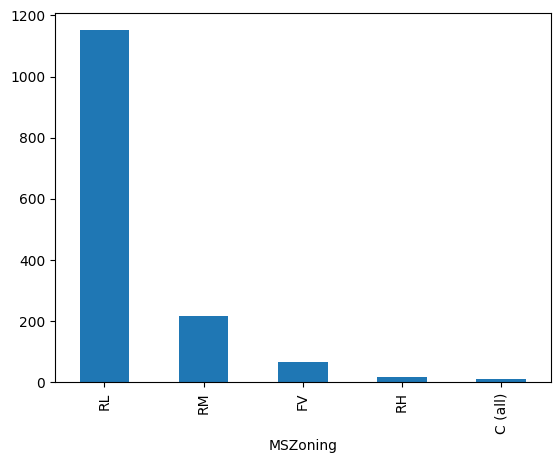

In [29]:
casas_analisis["MSZoning"].value_counts().plot.bar()

Nos percatamos que `RL - Residential Low Density` aparece más y `C (all) - Commercial` menos.

Analizamos el comportamiento de los precios de venta respecto a cada zona:

SalePrice    Axes(0.125,0.11;0.775x0.77)
dtype: object

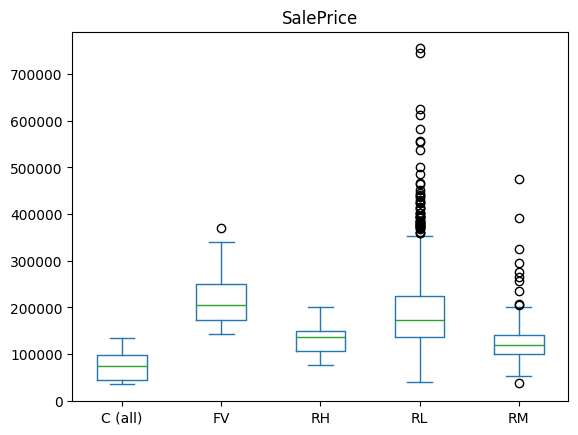

In [30]:
casas_analisis[["MSZoning", "SalePrice"]].plot.box("MSZoning")

Algunas categorías tienen bastantes puntos atípicos, los cuales deberían ser tratatos con un *winsorizado* para evitar degeneraciones.

### Conclusiones de la exploración de MSZoning

Observamos que el precio de venta de las casas si es distinto en cada zona, por ejemplo, en zonas comerciales los precios son al rededor de los $\$100,000$, mientras que en aldeas flotantes se elvan al rededor de los $\$200,000$ y $\$300,000$. Aunque no hay suficientes muestras que respalden estos precios, apenas $10$ y $65$ registros respectivamente.

También notamos que hay gran cantidad de puntos atípicos en la zona de residencial baja y media, lo cual también se relaciona al hecho de que tienen más registros ($1,151$ y $218$ respectivamente).

Esta columna corre el riesgo de una varianza casi cero ya que casi el $80\%$ de los datos son solo de la categoría `RL`.

Lo correcto para esta columna sería dividir $4$ ejes de datos de tipo *Dummies* para las categorías `C (all)`, `FV`, `RH` y `RM`, dejando la categoría `RM` como base.

Además a las categorías `FV`, `RM` y `RL` se les debería hacer un tratamiento de puntos atípicos.

Otra estrategia que podría funcionar es usar la codificación *Mean* para manejar un único eje de datos que combine el promedio de cada precio venta para cada categoría (tratando los puntos atípicos previamente con winsorizado).

## Columna 2 - LotArea

> Tipo de columna: Cuantitativo Continuo (valores enteros)

Este eje representa el área total del lote o terreno en pies cuadrados, podemos observar un mínimo de $1,300$ pies cuadrados que podría representar un mínimo reglamentario. Una mediana de $9,478$ pies cuadrados y una media de $10,516$, con un máximo de $215,245$ que se aleja bastante del resto.

Aquí conviene usar el *RIC/IQR* (Rango Inter-Cuartílico) para identificar los puntos atípicos y posiblemente limitarlos.

Inspeccionamos los primeros valores:

In [31]:
casas_analisis["LotArea"].head()

0     8450
1     9600
2    11250
3     9550
4    14260
Name: LotArea, dtype: int64

Aunque se ven enteros, estos se refieren a áreas, por lo que se pueden tratar de forma continua, por lo que visualizaremos su distribución en general mediante la caja:

<Axes: >

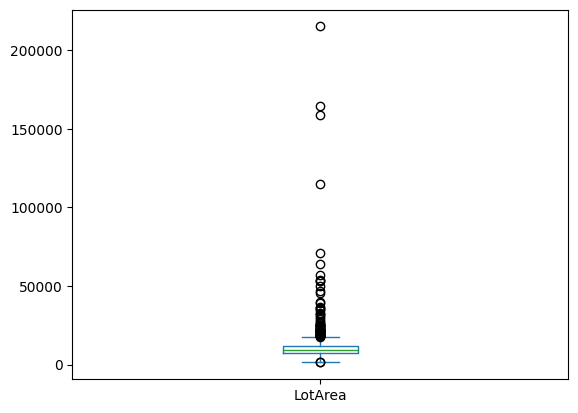

In [32]:
casas_analisis["LotArea"].plot.box()

Observamos gran cantidad de puntos atípicos que harían que la densidad se cargue a valores pequeños y deje a los valores más altos muy lejanos, esto lo podemos comprobar con la gráfica de densidad:

<Axes: ylabel='Density'>

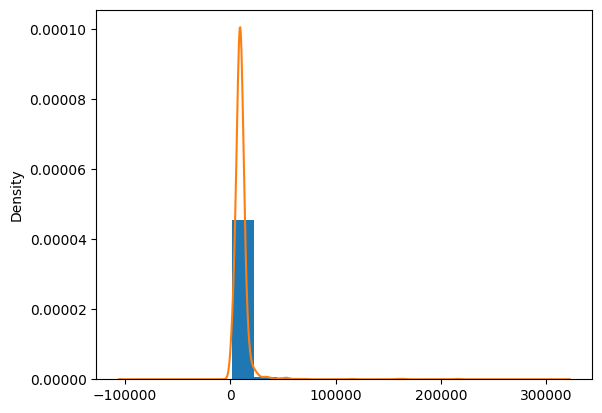

In [33]:
casas_analisis["LotArea"].plot.hist(density=True)
casas_analisis["LotArea"].plot.density()

Aquí debemos aplicar un winsorizado para evitar los puntos atípicos y colapsarlos al máximo y mínimo respecto al *IQR* (Rango Inter-Cuartílico).

Crearemos una nueva columna con la corrección:

1. Obtener el rango inter-cuartílico de `LotArea`
2. Obtener el límite máximo y mínimo relativos a $1.5 \cdot IQR$
3. Guardar los datos corregidos en otra columna
4. Guardar la información sobre si es un punto atípico superior o inferior

In [34]:
# Calculamos los cuartiles y el IQR
Q1 = casas_analisis["LotArea"].quantile(0.25)
Q3 = casas_analisis["LotArea"].quantile(0.75)
IQR = Q3 - Q1
# Calculamos los límites superior e inferior
sup = Q3 + 1.5 * IQR
inf = Q1 - 1.5 * IQR

print(inf, sup)

# Copiamos los datos de LotArea en la columna corregida
casas_analisis.loc[:, ["LotArea - Corregido"]] = casas_analisis["LotArea"].astype(float).copy()
# # Actualizamos los datos que superan al límite superior e inferior
casas_analisis.loc[casas_analisis["LotArea"] > sup, ["LotArea - Corregido"]] = sup
casas_analisis.loc[casas_analisis["LotArea"] < inf, ["LotArea - Corregido"]] = inf

# # Guardamos la información sobre si el punto es atípico superior o inferior
casas_analisis.loc[:, ["LotArea - Atípico Superior"]] = casas_analisis["LotArea"] > casas_analisis["LotArea - Corregido"]
casas_analisis.loc[:, ["LotArea - Atípico Inferior"]] = casas_analisis["LotArea"] < casas_analisis["LotArea - Corregido"]

# # Mostramos 10 muestras sobre las columnas corregidas
casas_analisis[["LotArea", "LotArea - Corregido", "LotArea - Atípico Superior", "LotArea - Atípico Inferior"]].sample(10)

1481.5 17673.5


,LotArea,LotArea - Corregido,LotArea - Atípico Superior,LotArea - Atípico Inferior
1103,8910,8910.0,False,False
338,14145,14145.0,False,False
645,10530,10530.0,False,False
1277,17871,17673.5,True,False
876,25286,17673.5,True,False
1257,4060,4060.0,False,False
1279,7500,7500.0,False,False
1019,3013,3013.0,False,False
379,8123,8123.0,False,False
148,7500,7500.0,False,False


Ahora podemos explorar mejor `LotArea` sin los puntos atípicos:

<Axes: >

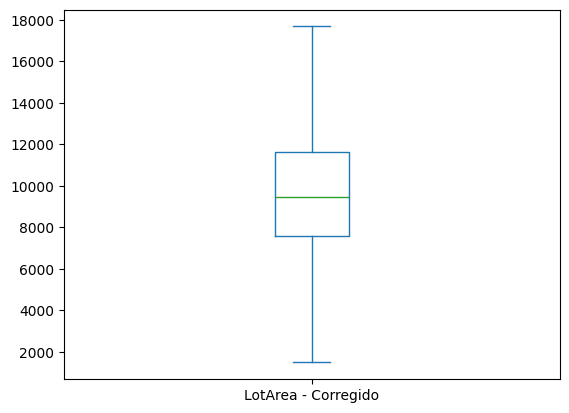

In [35]:
casas_analisis["LotArea - Corregido"].plot.box()

<Axes: ylabel='Density'>

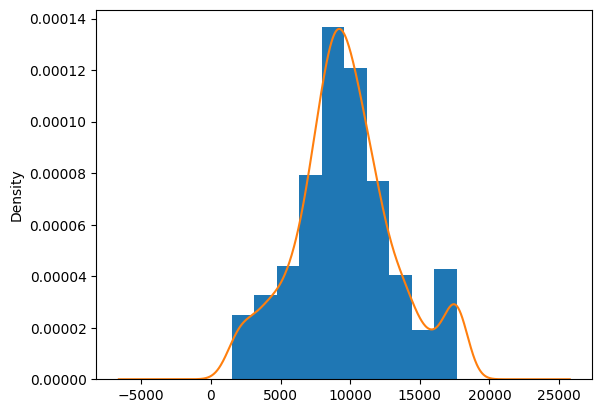

In [36]:
casas_analisis["LotArea - Corregido"].plot.hist(density=True)
casas_analisis["LotArea - Corregido"].plot.density()

Ahora podemos comparar el precio de venta contra el área de lote:

<Axes: xlabel='LotArea - Corregido', ylabel='SalePrice'>

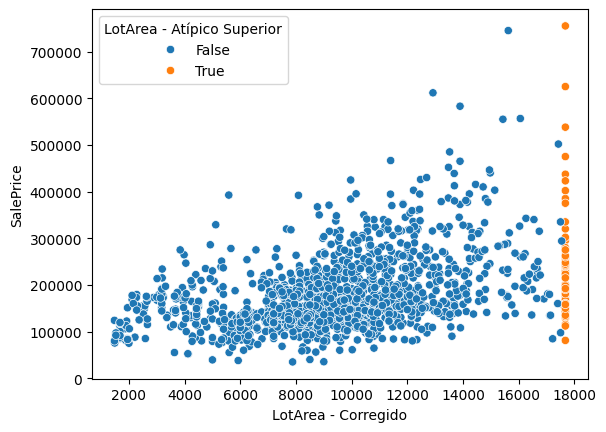

In [37]:
seaborn.scatterplot(casas_analisis, x="LotArea - Corregido", y="SalePrice", hue="LotArea - Atípico Superior")

Podemos ver que no se ve una fuerte asociación entre el precio de venta y el tamaño de lote, aunque si se observa que los valores máximos llegan más arriba cuando el tamaño de lote crece.

Podríamos comparar los cuartiles de área contra los cuartiles de precio de venta, para ver si hay una asociación visual más fuerte:

In [38]:
# Agregamos las categorías sobre el tamaño de lote y tipo de precio
casas_analisis.loc[:, ["LotArea - Tamaño"]] = pandas.qcut(casas_analisis["LotArea - Corregido"], q=[0.0, 0.333, 0.666, 1.0], labels=["Chico", "Mediano", "Grande"])
casas_analisis.loc[:, ["SalePrice - Tipo"]] = pandas.qcut(casas_analisis["SalePrice"], q=[0.0, 0.333, 0.666, 1.0], labels=["Barato", "Normal", "Caro"])

casas_analisis[["LotArea - Corregido", "LotArea - Tamaño", "SalePrice", "SalePrice - Tipo"]].sample(10)

,LotArea - Corregido,LotArea - Tamaño,SalePrice,SalePrice - Tipo
611,10395.0,Mediano,148000,Normal
158,12552.0,Grande,254900,Caro
440,15431.0,Grande,555000,Caro
526,13300.0,Grande,132000,Barato
585,11443.0,Grande,369900,Caro
1238,13072.0,Grande,142500,Normal
439,12354.0,Grande,110000,Barato
387,7200.0,Chico,125000,Barato
434,1890.0,Chico,81000,Barato
852,7128.0,Chico,164000,Normal


Ahora podemos ver el total de registros de cada categoría para ver si hay una asociación visual entre que el lote sea chico, mediano o grande y que el precio sea barato, normal o caro:

In [39]:
casas_analisis[["LotArea - Tamaño", "SalePrice - Tipo", "SalePrice"]].groupby(
    ["LotArea - Tamaño", "SalePrice - Tipo"], observed=True).count().unstack()

SalePrice            
SalePrice - Tipo    Barato Normal Caro
LotArea - Tamaño                      
Chico                  257    159   70
Mediano                163    176  148
Grande                  66    156  265

Ahora los visualizamos:

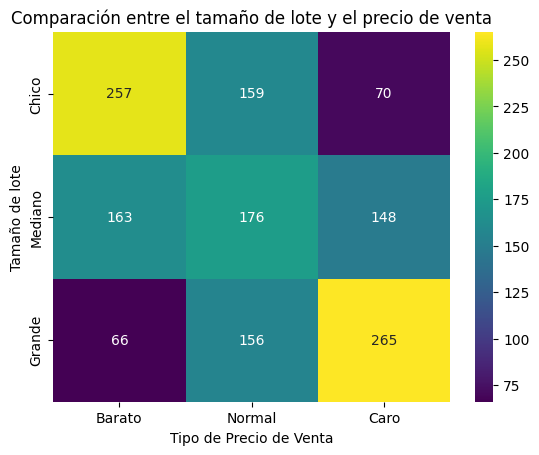

In [40]:
reporte = casas_analisis[["LotArea - Tamaño", "SalePrice - Tipo", "SalePrice"]].groupby(
    ["LotArea - Tamaño", "SalePrice - Tipo"], observed=True).count().unstack()

reporte.columns = reporte.columns.droplevel(0)

seaborn.heatmap(reporte,annot=True, fmt=".0f", cmap="viridis")
pyplot.xlabel("Tipo de Precio de Venta")
pyplot.ylabel("Tamaño de lote")
pyplot.title("Comparación entre el tamaño de lote y el precio de venta")
pyplot.show()

Podemos ver que la mayoría de lotes chicos tienden a tener precios de venta baratos, mientras que la mayoría de lotes grandes tienden a tener precios de venta caros.

Por lo que si hay una asociación entre el tamaño de lote y el precio de venta.

También podemos ver los datos normalizados para entender la proporciones:

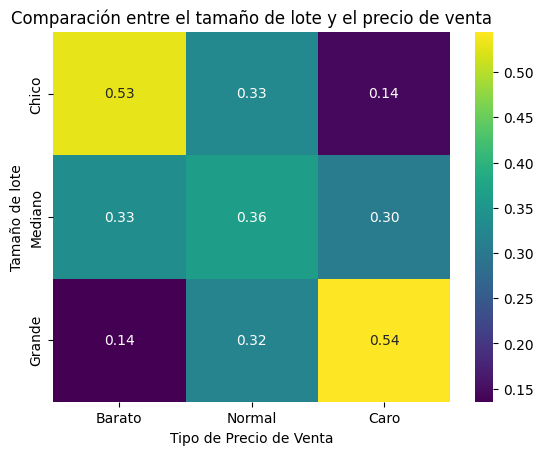

In [41]:
reporte = casas_analisis[["LotArea - Tamaño", "SalePrice - Tipo", "SalePrice"]].groupby(
    ["LotArea - Tamaño", "SalePrice - Tipo"], observed=True).count().unstack()

# Normalización por fila
reporte = reporte.div(reporte.sum(axis=1), axis=0)

reporte.columns = reporte.columns.droplevel(0)

seaborn.heatmap(reporte,annot=True, fmt=".2f", cmap="viridis")
pyplot.xlabel("Tipo de Precio de Venta")
pyplot.ylabel("Tamaño de lote")
pyplot.title("Comparación entre el tamaño de lote y el precio de venta")
pyplot.show()

Observamos que $53\%$ de los terrenos chicos se venden baratos, mientras que $54\%$ de los terrenos grandes se venden caros.

### Conclusiones de la exploración de LotArea

En esta exploración pudimos observar muchos puntos atípicos superiores que fueron corregidos con un proceso de winsorizado, preservando la información sobre que es un punto atípico y el valor corregido en columnas nuevas, evitando la pérdida de información.

Al no observar una fuerte correlación lineal entre `LotArea` y `SalePrice` hicimos un conteo en cuantiles al $33.3\%$ y $66.6\%$ para determinar si hay una asociación entre terrenos pequeños y precios bajos y terrenos grandes y precios altos. Lo que se confirmó observando una gran cantidad de terrenos chicos que son baratos y solo algunos terrenos chicos que son caros, contrastado con que mucho terrenos grandes son caros y pocos terrenos grandes son baratos.

Esto tomará mayor fuerza en la predicción y será importante dicha información.

## Columna 3 - Street

> Tipo de columna: Cualitativo Nominal (binario)

El tipo de calle indica si está pavimentada o es grava (terracería).

* **Pave** - Pavimentada
* **Grvl** - Grava

Como tenemos dos clases, podemos hacer un análisis binario.

Inspeccionamos los primeros valores:

In [42]:
casas_analisis["Street"].head()

0    Pave
1    Pave
2    Pave
3    Pave
4    Pave
Name: Street, dtype: object

Nos enfrentamos a otra columna categórica, por lo que podemos contar cuántos registros hay en cada categoría:

In [43]:
casas_analisis["Street"].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Vemos que hay una gran desproporción entre casas pavimentadas y de grava:

In [44]:
casas_analisis["Street"].value_counts(normalize=True)

Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64

Más del $99\%$ pertenecen a la categoría `Pave`.

Podemos visualizarlo mejor en un pastel:

<Axes: ylabel='proportion'>

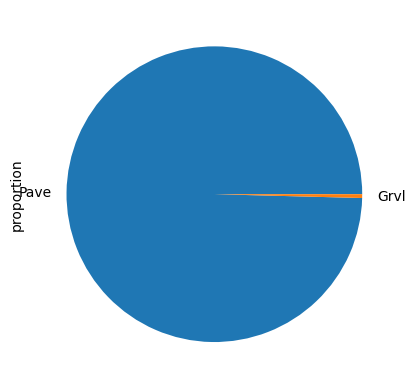

In [45]:
casas_analisis["Street"].value_counts(normalize=True).plot.pie()

En este caso, la varianza será casi cero, por lo que no vale la pena hacer más.

Aún así veremos cómo se comporta el precio de las casas por categoría:

SalePrice    Axes(0.125,0.11;0.775x0.77)
dtype: object

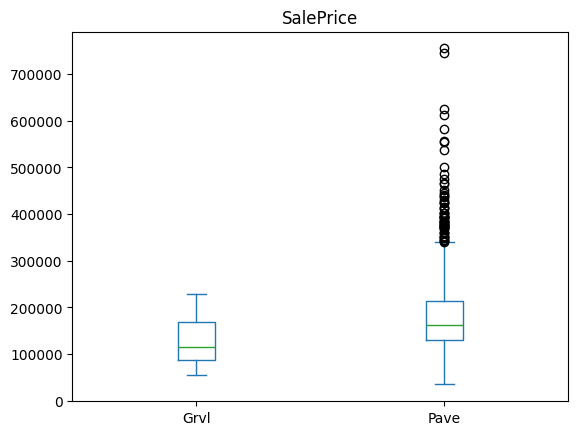

In [46]:
casas_analisis[["Street", "SalePrice"]].plot.box("Street")

Las casas de grava o terracería parecen tener un precio inferior a las pavimentadas.

### Conclusiones de la exploración de Street

Aunque la desproporción es bastante, es interesante la información sobre que si la casa no está pavimentada su precio será inferior. Sin embargo, la desproporción es alta, menos del $0.5\%$ caerá en estos casos, por lo que considerarla en un análisis podría solo entorpecerlo en lugar de beneficiarlo.

## Columna 4 - Neighborhood

> Tipo de columna: Cualitativo Nominal (multiclase)

Esta columna representa el vecindario al que pertenece la casa.

Inspeccionamos los primeros valores:

In [47]:
casas_analisis["Neighborhood"].head()

0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
Name: Neighborhood, dtype: object

Otra vez es una columna categórica, por lo que contaremos cuántos registros hay en cada clase:

In [48]:
casas_analisis["Neighborhood"].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

Observamos que hay bastantes clases y algunas dominan más.

En proporciones tenemos:

In [49]:
casas_analisis["Neighborhood"].value_counts(normalize=True)

Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: proportion, dtype: float64

Observamos que algunas categorías como `Veenker`, `NPkVill` y `Blueste` tienen menos del $1\%$ de los registros. Por lo que debemos tener cuidado al procesarlos.

Dada la gran cantidad de columnas, en lugar de hacer un tratamiento *One-Hot* o *Dummies*, podemos interpretar el precio promedio en cada clase:

In [50]:
casas_analisis[["Neighborhood", "SalePrice"]].groupby("Neighborhood").mean()

,SalePrice
Neighborhood,
Blmngtn,194870.882353
Blueste,137500.000000
BrDale,104493.750000
BrkSide,124834.051724
ClearCr,212565.428571
CollgCr,197965.773333
Crawfor,210624.725490
Edwards,128219.700000
Gilbert,192854.506329


Visualicemos estos promedios:

<Axes: xlabel='Neighborhood'>

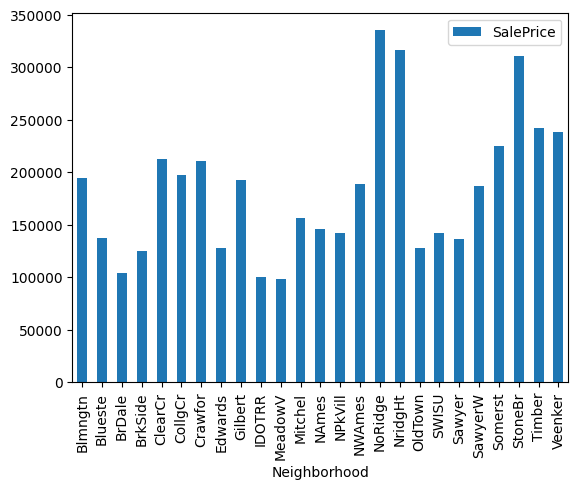

In [51]:
casas_analisis[["Neighborhood", "SalePrice"]].groupby("Neighborhood").mean().plot.bar()

Estos promedios son en realidad el límite de ver las cajas de cómo se dispersa el precio de venta en cada tipo de vecindario:

<Axes: xlabel='SalePrice', ylabel='Neighborhood'>

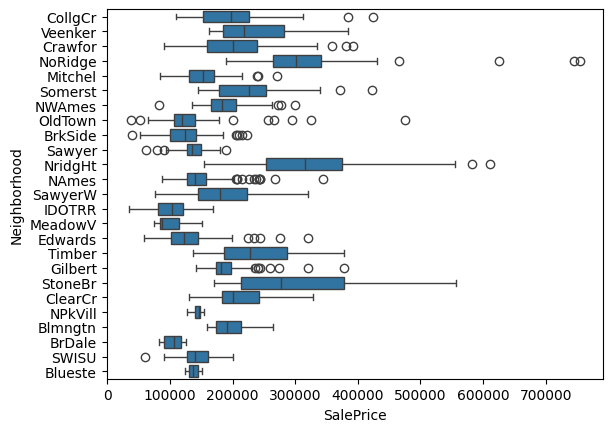

In [52]:
seaborn.boxplot(casas_analisis, x="SalePrice", y="Neighborhood")

Visualizamos las cajas al revés para no configurar la rotación de etiquetas.

Observamos algunos puntos atípicos, pero en general los precios más altos los tiene `NoRidge` y `NridgHt`, mientras que los más bajos los tiene `IDOTRR` y `MeadowV`.

Esto lo podemos ver mejor si ordenamos previamente:

In [53]:
casas_analisis[["Neighborhood", "SalePrice"]].groupby("Neighborhood").mean().sort_values(by="SalePrice", ascending=False)

,SalePrice
Neighborhood,
NoRidge,335295.317073
NridgHt,316270.623377
StoneBr,310499.000000
Timber,242247.447368
Veenker,238772.727273
Somerst,225379.837209
ClearCr,212565.428571
Crawfor,210624.725490
CollgCr,197965.773333


<Axes: ylabel='Neighborhood'>

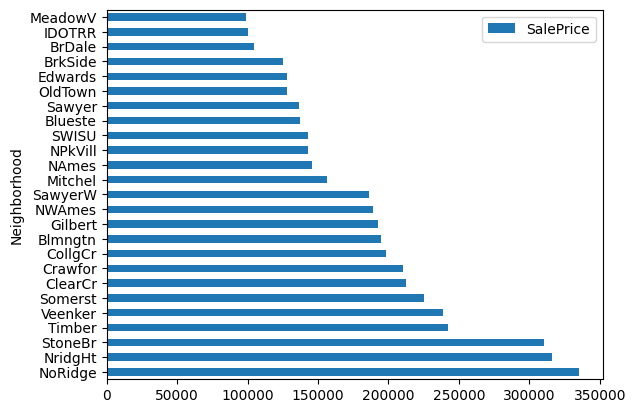

In [54]:
casas_analisis[["Neighborhood", "SalePrice"]].groupby("Neighborhood").mean().sort_values(by="SalePrice", ascending=False).plot.barh()

Podemos mezclar esta información en el conjunto de datos original, para saber de cada vecindario el precio promedio del precio de venta, generando una nueva columna con codificación tipo *Mean - Encoder*.

In [55]:
precioPromedioVecindario = casas_analisis[["Neighborhood", "SalePrice"]].groupby("Neighborhood").mean()

precioPromedioVecindario

,SalePrice
Neighborhood,
Blmngtn,194870.882353
Blueste,137500.000000
BrDale,104493.750000
BrkSide,124834.051724
ClearCr,212565.428571
CollgCr,197965.773333
Crawfor,210624.725490
Edwards,128219.700000
Gilbert,192854.506329


In [56]:
precioPromedioVecindario = casas_analisis.groupby("Neighborhood")["SalePrice"].mean()

casas_analisis.loc[:, ["SalePrice - Neighborhood"]] = casas_analisis["Neighborhood"].map(precioPromedioVecindario)

casas_analisis[["Neighborhood", "SalePrice", "SalePrice - Neighborhood"]].sample(10)

,Neighborhood,SalePrice,SalePrice - Neighborhood
368,NAmes,132000,145847.080000
715,NWAmes,165000,189050.068493
114,Crawfor,259500,210624.725490
741,Sawyer,142000,136793.135135
450,OldTown,110000,128225.300885
674,NAmes,140000,145847.080000
143,CollgCr,204000,197965.773333
555,BrkSide,113000,124834.051724
385,Blmngtn,192000,194870.882353
1003,NWAmes,136905,189050.068493


Sin embargo en las cajas vimos muchos puntos atípicos, una forma rápida de evitar estos sin hacer winsorizado, será usar la mediana en lugar de la media:

In [57]:
precioPromedioVecindario = casas_analisis.groupby("Neighborhood")["SalePrice"].median()

casas_analisis.loc[:, ["SalePrice - Neighborhood"]] = casas_analisis["Neighborhood"].map(precioPromedioVecindario)

casas_analisis[["Neighborhood", "SalePrice", "SalePrice - Neighborhood"]].sample(10)

,Neighborhood,SalePrice,SalePrice - Neighborhood
1218,BrkSide,80500,124300.0
489,MeadowV,86000,88000.0
890,NAmes,122900,140000.0
1212,Edwards,113000,121750.0
456,OldTown,98000,119000.0
241,OldTown,110500,119000.0
387,Edwards,125000,121750.0
1076,OldTown,170000,119000.0
817,Mitchel,271000,153500.0
1325,IDOTRR,55000,103000.0


Así tendremos valores más realistas en cada tipo de vecindario.

Esto lo podemos visualizar como:

<Axes: xlabel='SalePrice', ylabel='Neighborhood'>

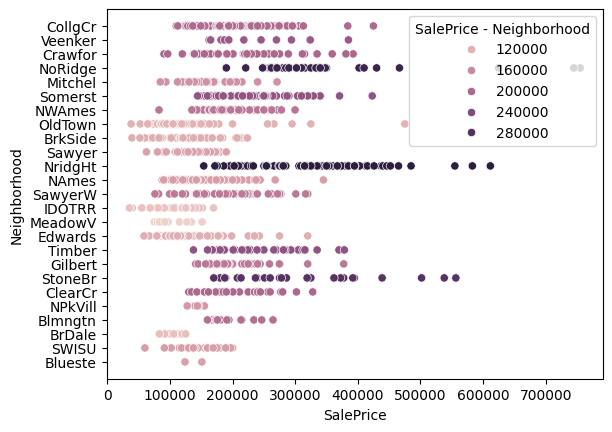

In [58]:
seaborn.scatterplot(casas_analisis, x="SalePrice", y="Neighborhood", hue="SalePrice - Neighborhood")

Así es más fácil ubicar en qué rango de precios se encuentra cada vecindario.

### Conclusiones de la exploración de Neighborhood

La columna que hace referencia al vecindario contiene múltiples clases que serán difíciles de manejar en *dummies*, por lo que una codificación al promedio de cada categoría es lo más razonable, incluso se puede utilizar la mediana para evitar la sensibilidad a los puntos atípicos.

## Columna 5 - YearBuilt

> Tipo de columna: Continua (Serie de tiempo)

Esta columna se refiere a la fecha de construcción de la casa.

Inspeccionamos los primeros datos:

In [59]:
casas_analisis["YearBuilt"].head()

0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64

El año de construicción indica un valor entero, que puede ser fácilmente un valor ordinal o serie de tiempo.

Visualizamos la distribución de los años de construcción:

<Axes: ylabel='Frequency'>

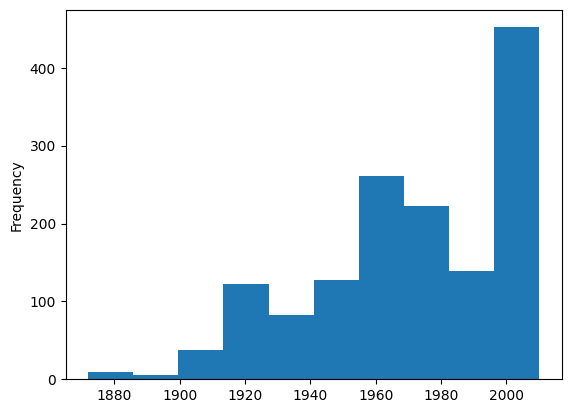

In [60]:
casas_analisis["YearBuilt"].plot.hist()

Vemos que las fechas van desde poco antes de 1880 hasta cerca del 2010.

Visualizaremos si hay relación entre el año de construcción y el precio de venta:

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

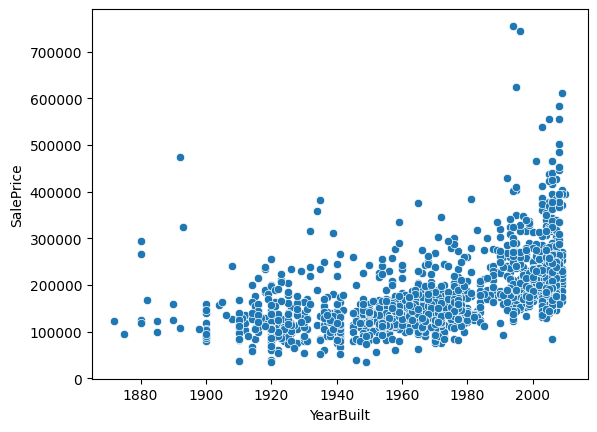

In [61]:
seaborn.scatterplot(casas_analisis, x="YearBuilt", y="SalePrice")

Vemos una ligera tendencia a que conforme aumenta el año sube el rango de los precios, esto es más fácil visualizar en cajas:

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

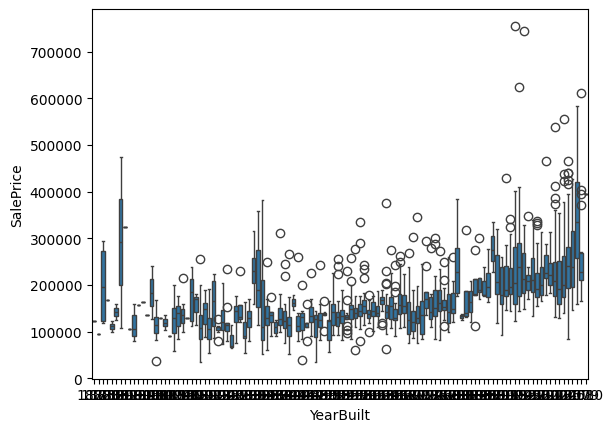

In [62]:
seaborn.boxplot(casas_analisis, x="YearBuilt", y="SalePrice")

Podemos observar que los precios parecen aumentar conforme la fecha avanza, exceptuando los primeros años que parecen atípicos.

Visualizamos la dispersión del año contra el precio y su cuantil de tipo de precio `Barato`, `Normal` y `Caro`:

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

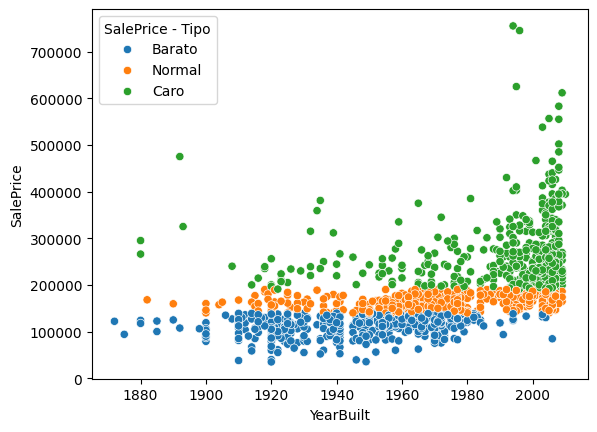

In [63]:
seaborn.scatterplot(casas_analisis, x="YearBuilt", y="SalePrice", hue="SalePrice - Tipo")

Podemos construir los datos que expliquen el precio promedio en cada año:

In [64]:
casas_analisis[["SalePrice", "YearBuilt"]].groupby("YearBuilt").mean()

,SalePrice
YearBuilt,
1872,122000.000000
1875,94000.000000
1880,200619.750000
1882,168000.000000
1885,111250.000000
...,...
2006,251775.447761
2007,255362.734694
2008,348849.130435


Visualizamos el precio promedio por año:

<Axes: xlabel='YearBuilt'>

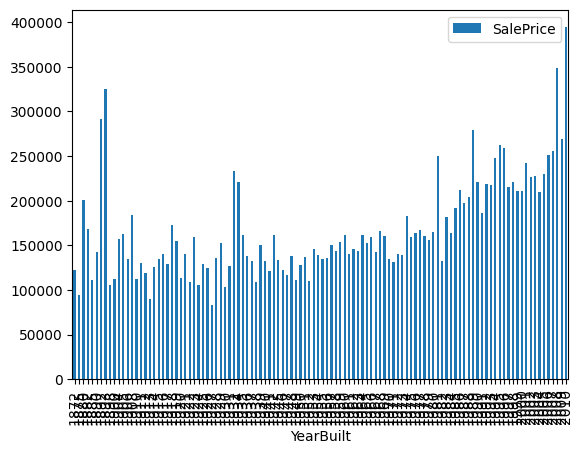

In [65]:
casas_analisis[["SalePrice", "YearBuilt"]].groupby("YearBuilt").mean().plot.bar()

Esto es equivalente a lo que visualizamos anteriormente en las cajas:

SalePrice    Axes(0.125,0.11;0.775x0.77)
dtype: object

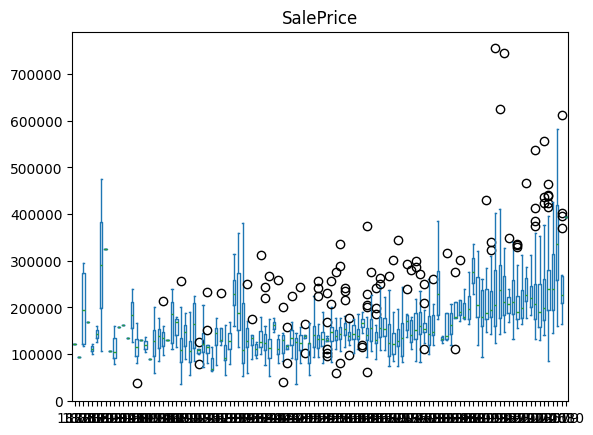

In [66]:
casas_analisis[["SalePrice", "YearBuilt"]].plot.box("YearBuilt")

Ahora podemos preguntarnos cuántos registros caen dentro de cada tipo de precio por año:

In [67]:
casas_analisis[["SalePrice - Tipo", "YearBuilt"]].groupby(["YearBuilt", "SalePrice - Tipo"], observed=True).size().unstack().fillna(0)

SalePrice - Tipo,Barato,Normal,Caro
YearBuilt,,,
1872,1.0,0.0,0.0
1875,1.0,0.0,0.0
1880,2.0,0.0,2.0
1882,0.0,1.0,0.0
1885,2.0,0.0,0.0
...,...,...,...
2006,1.0,13.0,53.0
2007,0.0,11.0,38.0
2008,0.0,1.0,22.0


Podemos visualizar estos conteos con un mapa de calor:

<Axes: xlabel='SalePrice - Tipo', ylabel='YearBuilt'>

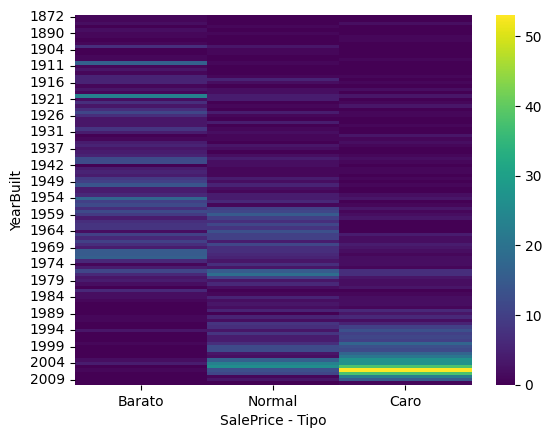

In [68]:
reporte = casas_analisis[["SalePrice - Tipo", "YearBuilt"]].groupby(["YearBuilt", "SalePrice - Tipo"], observed=True).size().unstack().fillna(0)

seaborn.heatmap(reporte, cmap="viridis")

Observamos que los precios de venta caros se acumulan en fechas más recientes al 2010.

Una forma más estable de visualizar esto es mediante la caja que explique por cada tipo de precio el rango de años en el que se distribuye más.

<Axes: xlabel='SalePrice - Tipo', ylabel='YearBuilt'>

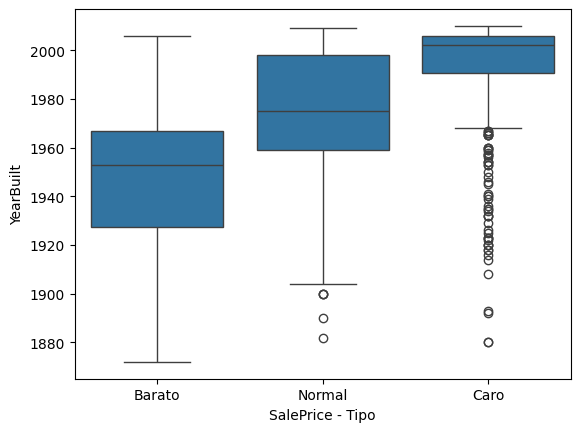

In [69]:
seaborn.boxplot(data=casas_analisis, x="SalePrice - Tipo", y="YearBuilt")

Observamos que para las décadas de los 30s a los 60s las casas eran generalmente baratas, mientras que de los 60s a los 90s las casas tuvieron un precio normal y este se elevo del los 90s al 2010 con precios de casas caros.

También podemos explorar el tamaño de lotes que se adquirieron:

<Axes: xlabel='SalePrice - Tipo', ylabel='YearBuilt'>

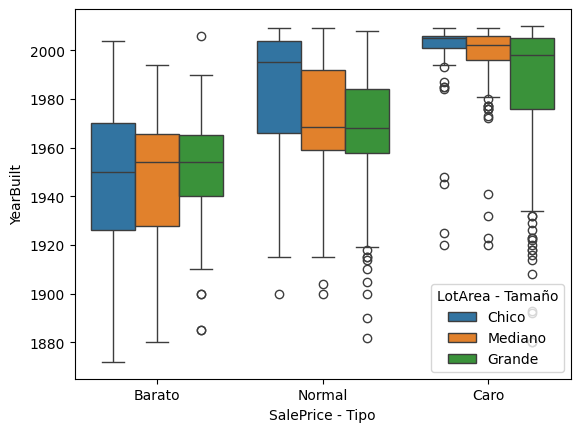

In [70]:
seaborn.boxplot(data=casas_analisis, x="SalePrice - Tipo", y="YearBuilt", hue="LotArea - Tamaño")

Observamos que los tamaños de lote también se incrementaron en general.

### Conclusiones de la exploración de YearBuilt

El explorar el año de construcción contra el precio de venta, observamos las casa incrementaron su rango de precio hacia los años del 2000 hacia adelante.

Esto refleja una fuerte asociación entre el año de construcción y el precio de la casa, aunque esto se podría explicar porque el tamaño de lote también incrementó en general.

## Columna 6 - OverallCond

> Tipo de columna: Categórica (multiclase)

Esta columna se refiere a la calidad general de la casa en una escala del 1 al 9:

* **1** - Muy pobre (Very Poor)
* **2** - Pobre (Poor)
* **3** - Regular (Fair)
* **4** - Aceptable inferior (Below Average)
* **5** - Promedio (Average)
* **6** - Aceptable superior (Above Average)
* **7** - Buena (Good)
* **8** - Muy buena (Very Good)
* **9** - Excelente (Excellent)


Inspeccionamos los primeros valores:

In [71]:
casas_analisis["OverallCond"].head()

0    5
1    8
2    5
3    5
4    5
Name: OverallCond, dtype: int64

Contamos cada tipo de condición general de la casa:

In [72]:
casas_analisis["OverallCond"].value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

Vemos que hay muchos datos en una condición intemedia de $5$, por lo que mostramos la proporción:

In [73]:
casas_analisis["OverallCond"].value_counts(normalize=True)

OverallCond
5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: proportion, dtype: float64

Entonces $56\%$ de las casas tienen una condición promedio, mientras que las codiciones `1` y `2` (muy pobre y pobre) representan solo menos del $1\%$ de los datos.

Visualizamos estas distribuciones en forma de barras:

<Axes: xlabel='OverallCond'>

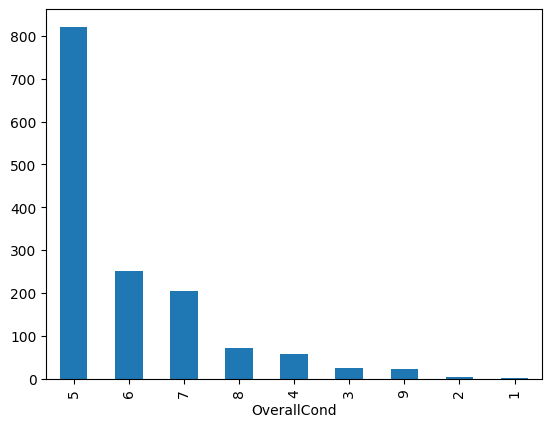

In [74]:
casas_analisis["OverallCond"].value_counts().plot.bar()

Obtenemos los rangos de precio en cada condición de casa (del `1` al `9`):

SalePrice    Axes(0.125,0.11;0.775x0.77)
dtype: object

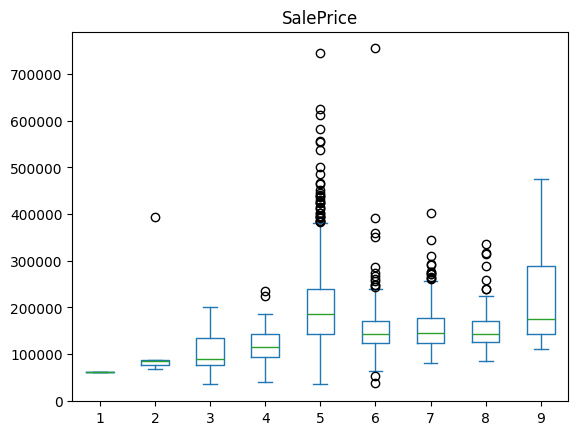

In [75]:
casas_analisis[["OverallCond", "SalePrice"]].plot.box("OverallCond")

Vemos que las casas de mejor condición tienen un rango superior, hay muchos puntos atípicos en las casa de condición promedio y las casas más baratas tienen el rango inferior.

Podemos ver esta proporción contando cuántas casas hay por tipo de precio:

In [88]:
casas_analisis[["OverallCond", "SalePrice - Tipo"]].groupby(["OverallCond", "SalePrice - Tipo"], observed=True).size().unstack().fillna(0)

SalePrice - Tipo,Barato,Normal,Caro
OverallCond,,,
1,1.0,0.0,0.0
2,4.0,0.0,1.0
3,20.0,3.0,2.0
4,41.0,14.0,2.0
5,174.0,270.0,377.0
6,113.0,100.0,39.0
7,96.0,65.0,44.0
8,33.0,30.0,9.0
9,4.0,9.0,9.0


Visualizamos esta información en un mapa de calor que explique en qué condición están las casas más baratas y las más caras:

<Axes: xlabel='SalePrice - Tipo', ylabel='OverallCond'>

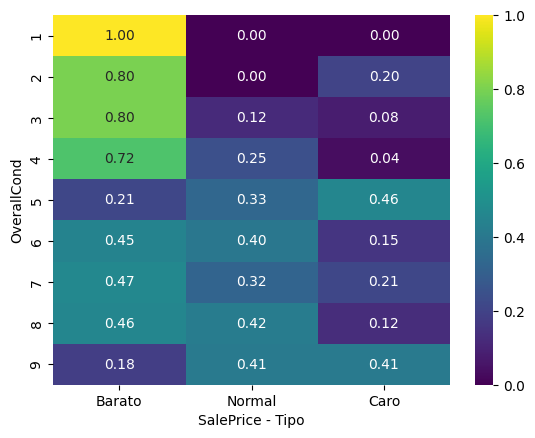

In [99]:
reporte = casas_analisis[["OverallCond", "SalePrice - Tipo"]].groupby(["OverallCond", "SalePrice - Tipo"], observed=True).size().unstack().fillna(0)

reporte = reporte.div(reporte.sum(axis=1), axis=0)

seaborn.heatmap(reporte, cmap="viridis", annot=True, fmt=".2f")

Se aprecia que las casas más baratas están en una condición pobre, mientras las más caras en una condición mayor. Aunque los puntos atípicos hacen dificíl ver esto.

In [95]:
casas_analisis.loc[:, ["OverallCond - Agrupado"]] = casas_analisis["OverallCond"].copy()

casas_analisis.loc[casas_analisis["OverallCond"] <= 4, ["OverallCond - Agrupado"]] = "Pobre"
casas_analisis.loc[casas_analisis["OverallCond"] == 5, ["OverallCond - Agrupado"]] = "Medio"
casas_analisis.loc[casas_analisis["OverallCond"] >= 6, ["OverallCond - Agrupado"]] = "Aceptable"

casas_analisis[["OverallCond", "OverallCond - Agrupado"]].sample(5)

,OverallCond,OverallCond - Agrupado
143,5,Medio
1319,5,Medio
1025,5,Medio
1059,7,Aceptable
78,5,Medio


<Axes: xlabel='SalePrice - Tipo', ylabel='OverallCond - Agrupado'>

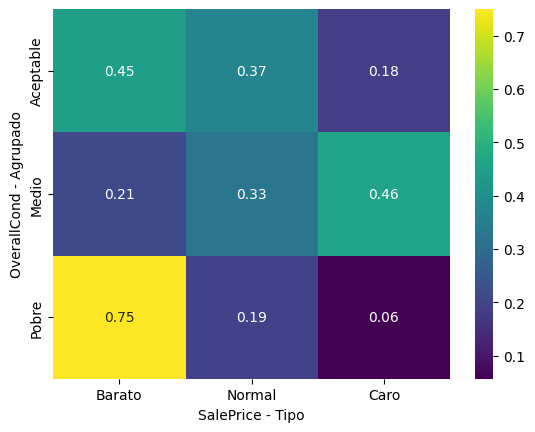

In [98]:
reporte = casas_analisis[["OverallCond - Agrupado", "SalePrice - Tipo"]].groupby(["OverallCond - Agrupado", "SalePrice - Tipo"], observed=True).size().unstack().fillna(0)

reporte = reporte.div(reporte.sum(axis=1), axis=0)

seaborn.heatmap(reporte, cmap="viridis", annot=True, fmt=".2f")

Entonces, ahora es más fácil ver que $75\%$ de las casas en condición pobre son baratas, pero no se logra alcanzar aún la diferencia más marcada en las casas aceptables, aún faltaría quitar los puntos atípicos.

### Conclusiones de la exploración de OverallCond

La condición general de la casa puede ayudar a mejorar la predicción del precio venta si se considera quitar los puntos atípicos y quizás reducir el número de clases, por ejemplo, si está en mala condición (`1`, `2`, `3` o `4`), si está en condición promedio (`5`) o si está en buena condición o aceptable (`6`, `7`, `8`, `9`).

# Fase 3 - Análisis de las columnas 7 a la 11

# Preprocesamiento

### Exploración preliminar de la información
### Análisis exploratorio de datos

In [ ]:
# Se importa la libreria pandas
import pandas as pd

In [ ]:
df_casas = pd.read_csv("Casas.csv")
df_casas

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Se tienen 1460 registros

In [ ]:
df_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

se observa que dtypes nos dice que hay 3 variables flotantes, 35 enteras y 43 posibles variables categóricas, se puede ver que la variable **Alley** le faltan registros, ya que solo hay 91

In [ ]:
df_casas.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


El **dataframe df_casas** tiene 1460 renglones (observaciones) y 81 columnas (variables), de las 81 variables solo se pide analizar las siguientes:

* MSZoning
* LotArea
* Street
* Neighborhood
* YearBuilt
* OverallCond
* ExterQual
* GrLivArea
* FullBath
* GarageArea
* BsmtCond
* FireplaceQu
* Electrical
* LotFrontage
* KitchenQual
* PavedDrive
* SalePrice (será la variable respuesta)

Por lo que se genera una lista con las variables a analizar:

In [ ]:
columnas_tarea = ['MSZoning', 'LotArea','Street','Neighborhood', 'YearBuilt', 'OverallCond', 'ExterQual',
'GrLivArea','FullBath', 'GarageArea', 'BsmtCond', 'FireplaceQu', 'Electrical', 'LotFrontage', 'KitchenQual', 'PavedDrive', 'SalePrice']

df_casas_tarea = df_casas[columnas_tarea]
df_casas_tarea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1460 non-null   object 
 1   LotArea       1460 non-null   int64  
 2   Street        1460 non-null   object 
 3   Neighborhood  1460 non-null   object 
 4   YearBuilt     1460 non-null   int64  
 5   OverallCond   1460 non-null   int64  
 6   ExterQual     1460 non-null   object 
 7   GrLivArea     1460 non-null   int64  
 8   FullBath      1460 non-null   int64  
 9   GarageArea    1460 non-null   int64  
 10  BsmtCond      1423 non-null   object 
 11  FireplaceQu   770 non-null    object 
 12  Electrical    1459 non-null   object 
 13  LotFrontage   1201 non-null   float64
 14  KitchenQual   1460 non-null   object 
 15  PavedDrive    1460 non-null   object 
 16  SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(7), object(9)
memory usage: 194.0+ KB


las variables que se van a trabajar son 1 flotante, 7 variables enteras y 9 categóricas, del dato # 0 al 15 serán las covariables y el 16 será la respuesta

Se observa que hay valores faltantes para las variables (BsmtCond,FireplaceQu, Electrica y LotFrontage)

Es útil conocer el número diferente de niveles de variables categóricas se puede primero generar un marco de datos con puros objetos tipo object y luego concatenar los métodos **nunique** y **reset_index** para crear un dataframe con los valores únicos de cada variable categórica

In [ ]:
# Seleccionan las columnas de tipo 'object'
df_casas_tarea_object = df_casas_tarea.select_dtypes(include = 'object')

# Obtener el número de valores únicos para cada columna tipo object
df_casas_tarea_resumen = df_casas_tarea_object.nunique().reset_index()
df_casas_tarea_resumen.columns = ['Variable', 'Valores únicos']

# Se muestra el resumen
print(df_casas_tarea_resumen)

       Variable  Valores únicos
0      MSZoning               5
1        Street               2
2  Neighborhood              25
3     ExterQual               4
4      BsmtCond               4
5   FireplaceQu               5
6    Electrical               5
7   KitchenQual               4
8    PavedDrive               3


la variable con mayor niveles es Neighborhood

In [ ]:
df_casas_tarea_resumen

,Variable,Valores únicos
0,MSZoning,5
1,Street,2
2,Neighborhood,25
3,ExterQual,4
4,BsmtCond,4
5,FireplaceQu,5
6,Electrical,5
7,KitchenQual,4
8,PavedDrive,3


## Clasificación de covariables


Covariable 7 ExterQual: Evalúa la calidad del material del exterior

Tipo de dato: cualitativa (categórica) ordinal

Sus niveles son:

Ex	Excelente
Gd	Bueno
TA	Media/ típica
Fa	Regular 
Po	Mala


In [ ]:
df_casas_tarea['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

Covariable 8 GrLivArea: Superficie habitable por encima del nivel del suelo en pies cuadrados

Tipo de dato: Cuantitativa continua

In [ ]:
df_casas_tarea['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

el área promedio es de 1515.4637 $ft^2$, valor mínimo de superficie habitable es de 334 $ft^2$ y el máximo es de 5642 $ft^2$

Covariable 9 FullBath: Baños completos sobre el nivel del suelo.

Tipo de dato: Cuantitativa discreta


In [ ]:
df_casas_tarea['FullBath'].describe()

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64

el número máximo de baños registrados es 3

Covariable 10 GarageArea: Superificie del garaje en pies cuadrados

Tipo de dato: Cuantitativa continua

In [ ]:
df_casas_tarea['GarageArea'].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

la superficie promedio es de 472.98 $ft^2$ y la máxima es de 1418 $ft^2$

Covariable 11 BsmtCond: Evalúa el estado general del sótano

Tipo de dato: Cualitativa (categórica) ordinal

Sus niveles son:

Ex	Excelente 
Gd	Bueno
TA	Típico - se permite una ligera humedad
Fa	Regular - humedad o algunas grietas o asentamientos
Po	Deficiente - grietas graves, asentamientos o humedad
NA Sin sótano

In [ ]:
df_casas_tarea['BsmtCond'].unique()
df_casas_tarea['BsmtCond'].describe()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

hay un problema ya que se tienen datos , hay 1423 registros de 1460

## Tratamiento de datos faltantes

In [ ]:

# porcentaje de valores faltantes por columna
datos_faltantes = df_casas_tarea.isnull().mean()*100

# mostrar solo columnas con al mneos un valor faltante

datos_faltantes = datos_faltantes[datos_faltantes> 0].sort_values(ascending= False)

print(datos_faltantes)


FireplaceQu    47.260274
LotFrontage    17.739726
BsmtCond        2.534247
Electrical      0.068493
dtype: float64


Se realiza el tratamiento de datos para "BsmtCond"

In [ ]:
# Verificar el porcentaje de valores faltantes
porcentaje_faltantes = df_casas_tarea["BsmtCond"].isnull().mean() * 100
print(f"Porcentaje de valores faltantes en BsmtCond: {porcentaje_faltantes:.2f}%")

# Si el porcentaje es menor al 5%, eliminar esos registros
if porcentaje_faltantes < 5:
    df_casas_tarea = df_casas_tarea.dropna(subset=["BsmtCond"])
    print("Filas con valores faltantes en BsmtCond eliminadas.")
else:
    print("Más del 5% de los datos faltan en BsmtCond. No se eliminaron filas.")

# Mostrar el nuevo número de observaciones
print(f"Nuevo tamaño del DataFrame: {df_casas_tarea.shape}")


Porcentaje de valores faltantes en BsmtCond: 0.00%
Filas con valores faltantes en BsmtCond eliminadas.
Nuevo tamaño del DataFrame: (1423, 17)


## Análisis de la distribución de la respuesta y relación de la respuesta con las preditoras.

**1. SalePrice vs Variables Continuas**
Se analizarán con:

* Correlación de Pearson

* Gráfica de dispersión (scatter plot)

Variables continuas:

* LotArea

* GrLivArea

* GarageArea

* LotFrontage

Correlación de LotArea con SalePrice: 0.2638


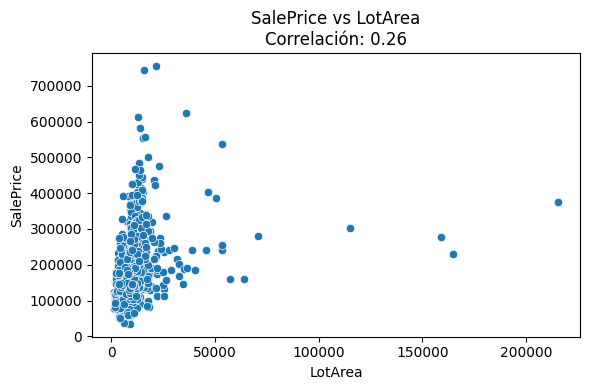

Correlación de GrLivArea con SalePrice: 0.7093


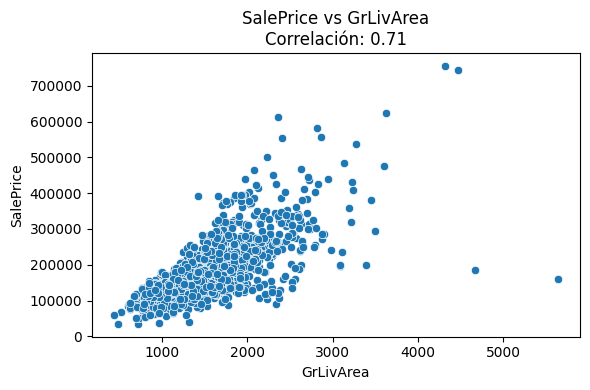

Correlación de GarageArea con SalePrice: 0.6226


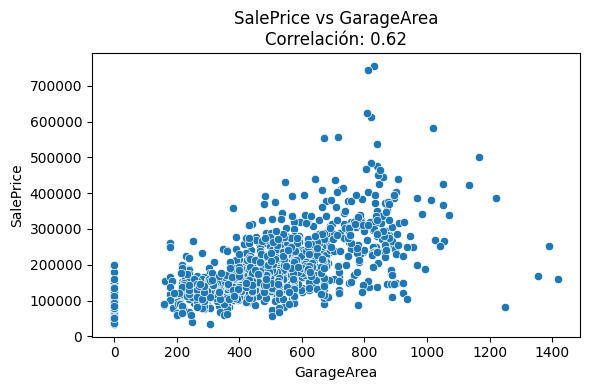

Correlación de LotFrontage con SalePrice: 0.3520


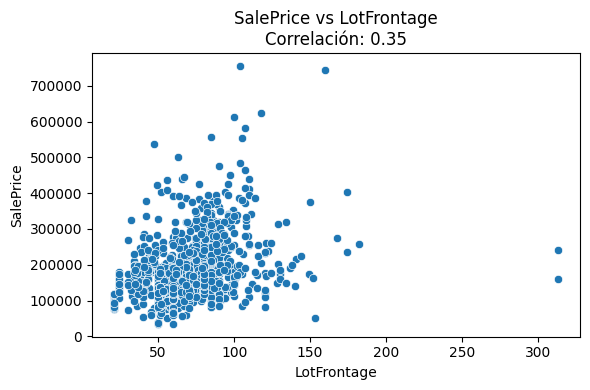

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables continuas
continuas = ["LotArea", "GrLivArea", "GarageArea", "LotFrontage"]

# Cálculo de correlaciones y gráficas de dispersión
for var in continuas:
    correlacion = df_casas_tarea[[var, "SalePrice"]].corr().iloc[0, 1]
    print(f"Correlación de {var} con SalePrice: {correlacion:.4f}")
    
    # Gráfica de dispersión
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_casas_tarea, x=var, y="SalePrice")
    plt.title(f"SalePrice vs {var}\nCorrelación: {correlacion:.2f}")
    plt.xlabel(var)
    plt.ylabel("SalePrice")
    plt.tight_layout()
    plt.show()


La única que muestra una correlación considerable de 0.72 es GrLivArea que es la superficie habitable, por lo que a mayor superficie es más cara

**2. SalePrice vs Variables Discretas (tipo conteo)**
Se analizarán con:

Estas variables son numéricas, pero representan conteos o calificaciones discretas, por eso analizamos: Correlación de Pearson y gráfica de dispersión para ver las tendencias

    Variables discretas:

* FullBath

* YearBuilt

* OverallCond

Correlación de FullBath con SalePrice: 0.5735


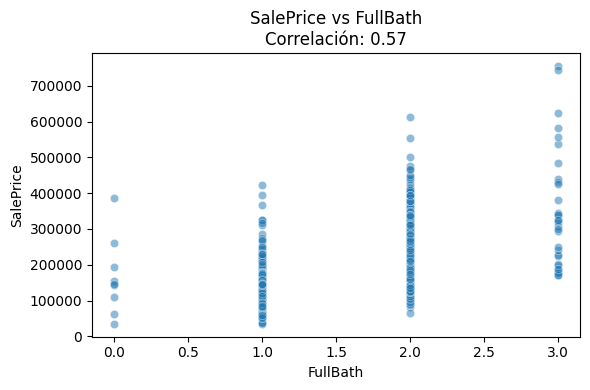

Correlación de YearBuilt con SalePrice: 0.5186


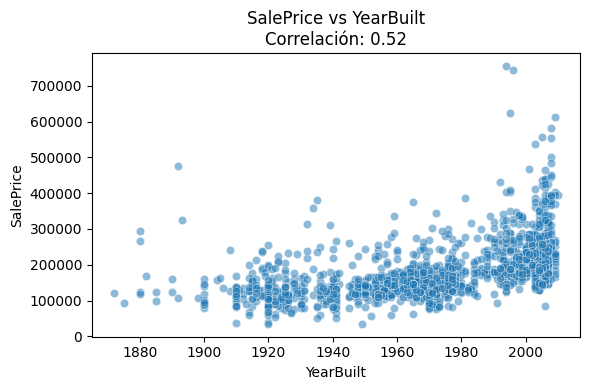

Correlación de OverallCond con SalePrice: -0.0954


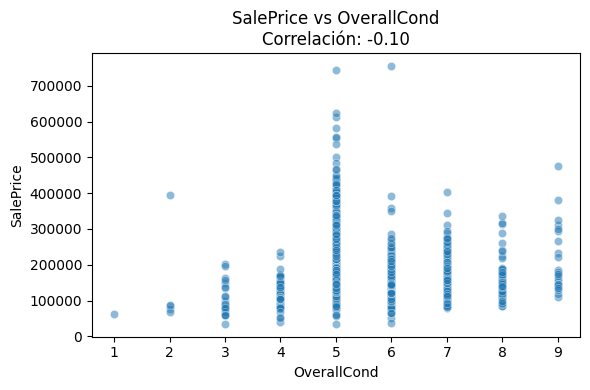

In [ ]:
# Lista de variables discretas
discretas = ["FullBath", "YearBuilt", "OverallCond"]

# Cálculo de correlaciones y gráficas de dispersión
for var in discretas:
    correlacion = df_casas_tarea[[var, "SalePrice"]].corr().iloc[0, 1]
    print(f"Correlación de {var} con SalePrice: {correlacion:.4f}")
    
    # Gráfica de dispersión
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_casas_tarea, x=var, y="SalePrice", alpha=0.5)
    plt.title(f"SalePrice vs {var}\nCorrelación: {correlacion:.2f}")
    plt.xlabel(var)
    plt.ylabel("SalePrice")
    plt.tight_layout()
    plt.show()


**3. SalePrice vs Variables Ordinales o Nominales**
Se analizarán con:

* Gráfica de cajas (boxplot) para comparar distribución de precios entre categorías

Variables ordinales/nominales:

* MSZoning

* Street

* Neighborhood

* ExterQual

* BsmtCond

* FireplaceQu

* Electrical

* KitchenQual

* PavedDrive

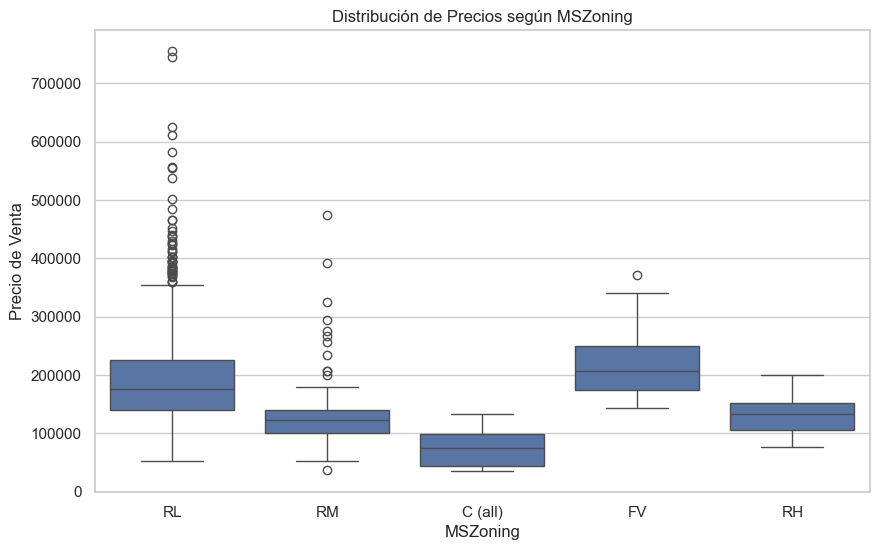

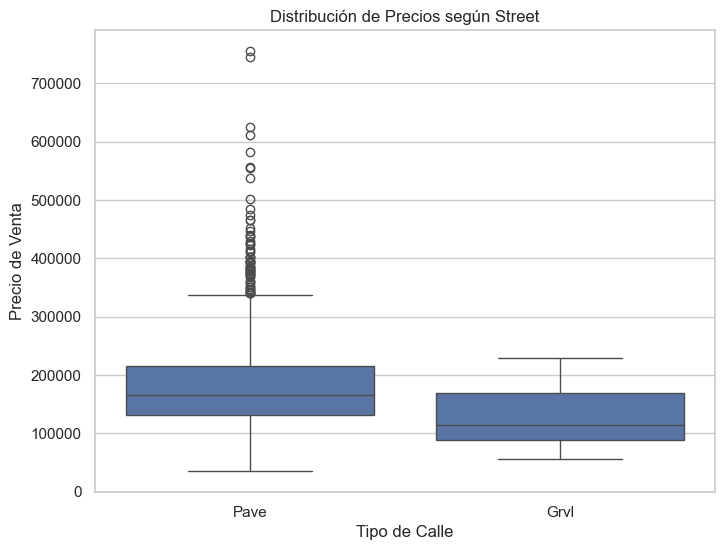

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración general de estilo
sns.set(style="whitegrid")

# Boxplot para MSZoning vs SalePrice
plt.figure(figsize=(10,6))
sns.boxplot(x='MSZoning', y='SalePrice', data=df_casas_tarea)
plt.title('Distribución de Precios según MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('Precio de Venta')
plt.show()

# Boxplot para Street vs SalePrice
plt.figure(figsize=(8,6))
sns.boxplot(x='Street', y='SalePrice', data=df_casas_tarea)
plt.title('Distribución de Precios según Street')
plt.xlabel('Tipo de Calle')
plt.ylabel('Precio de Venta')
plt.show()


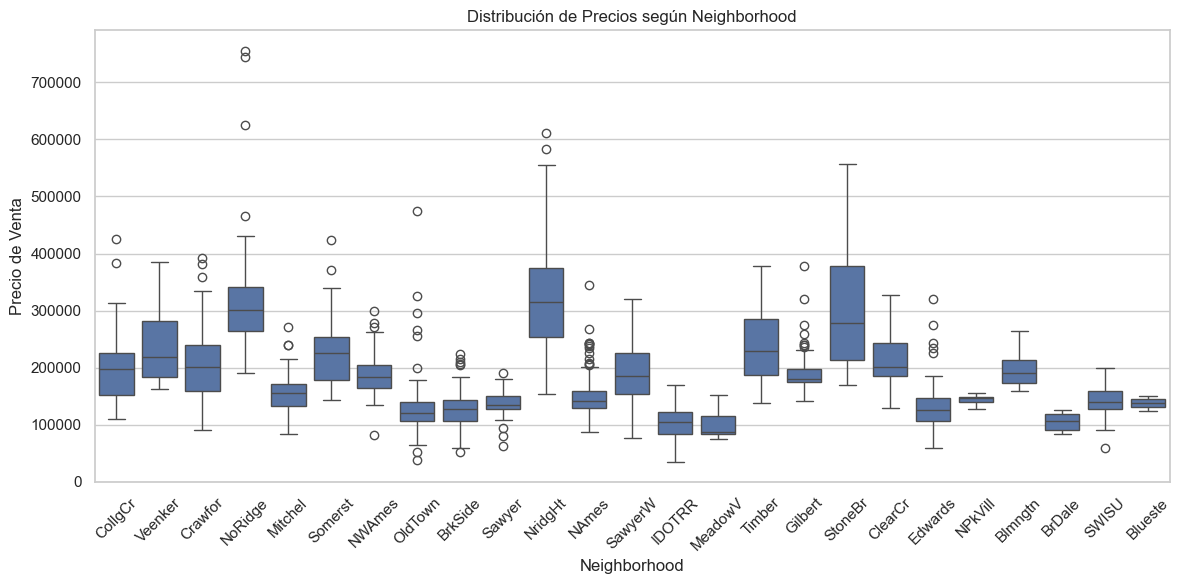

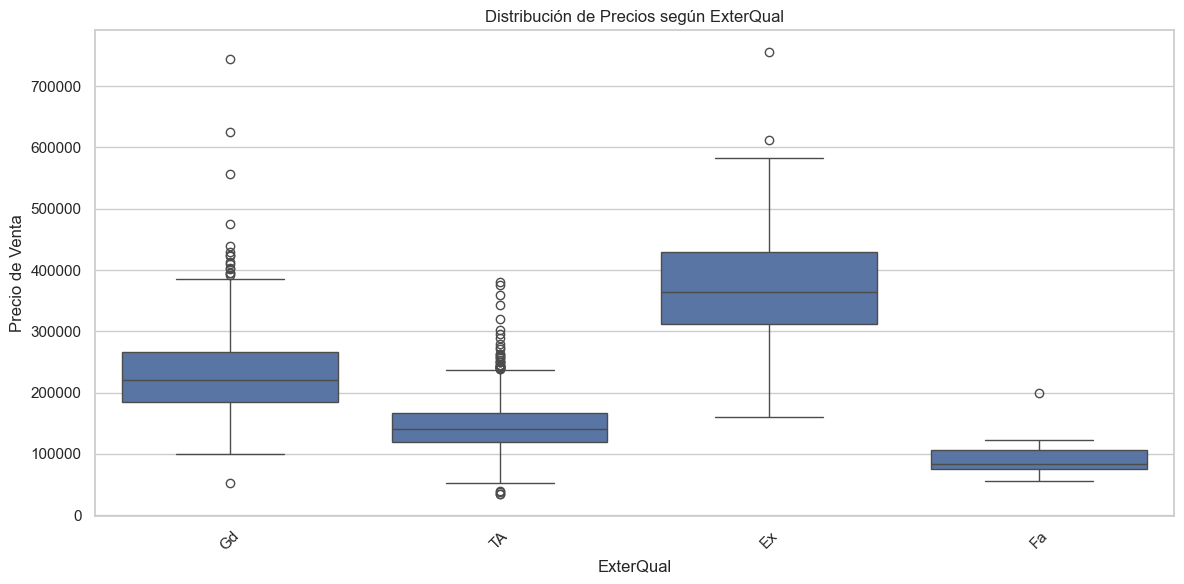

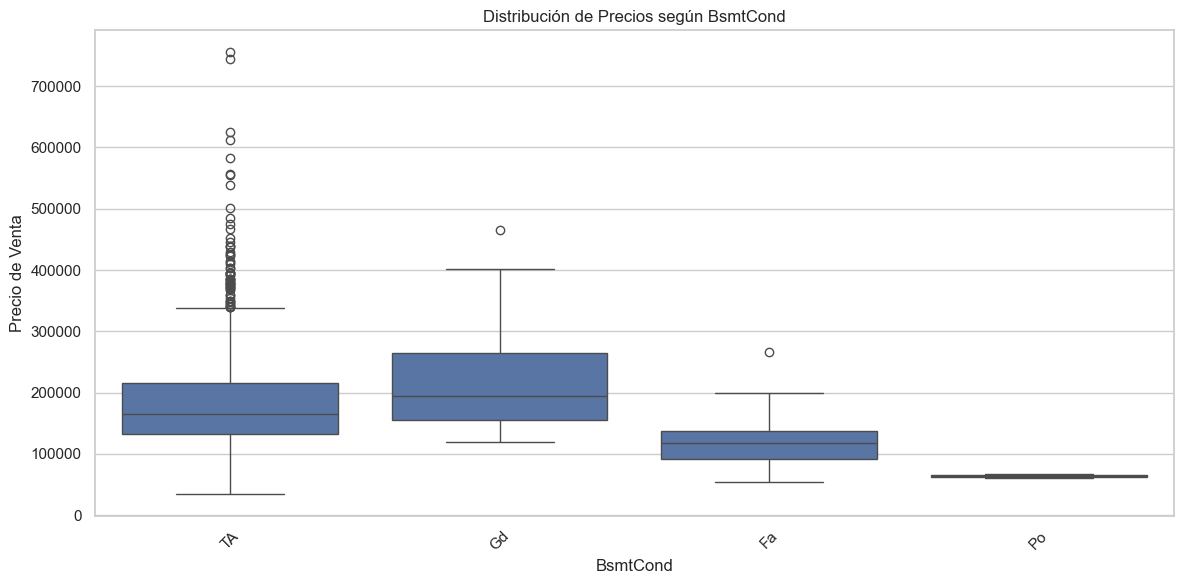

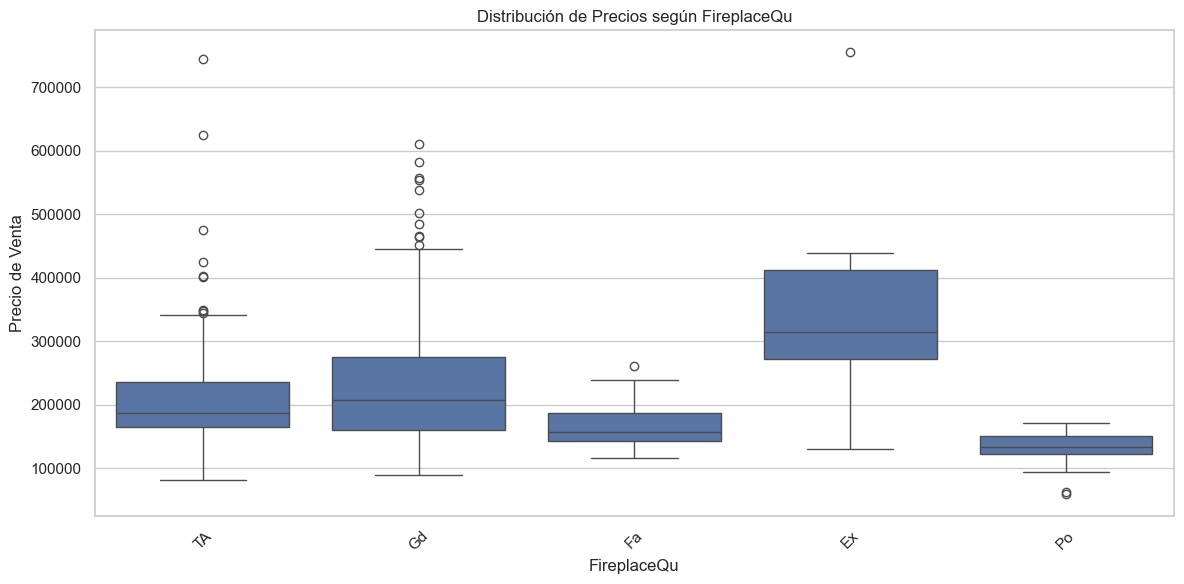

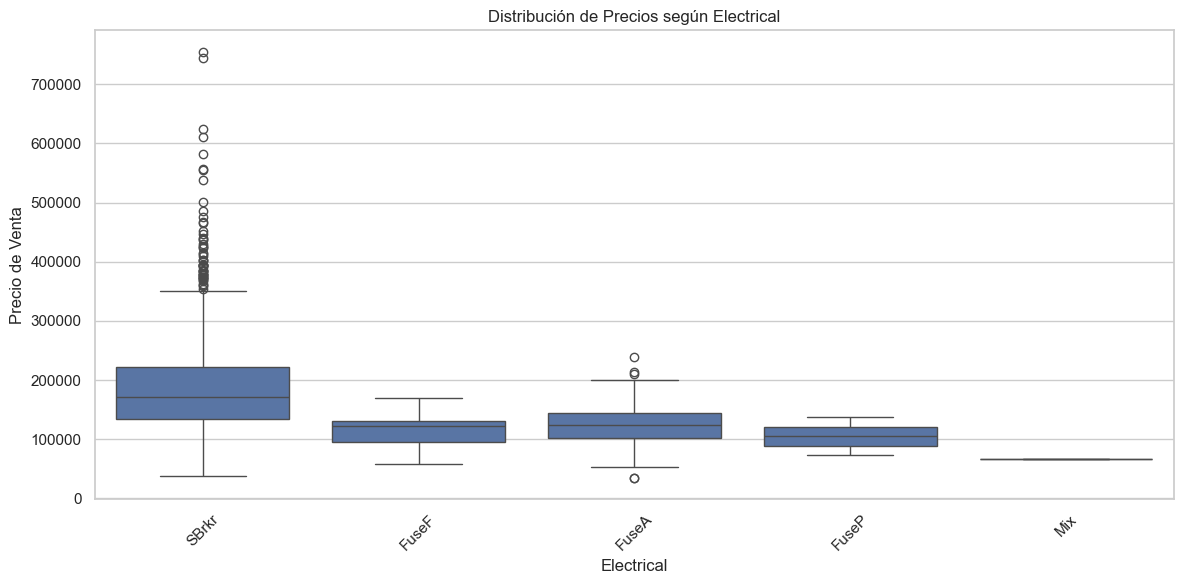

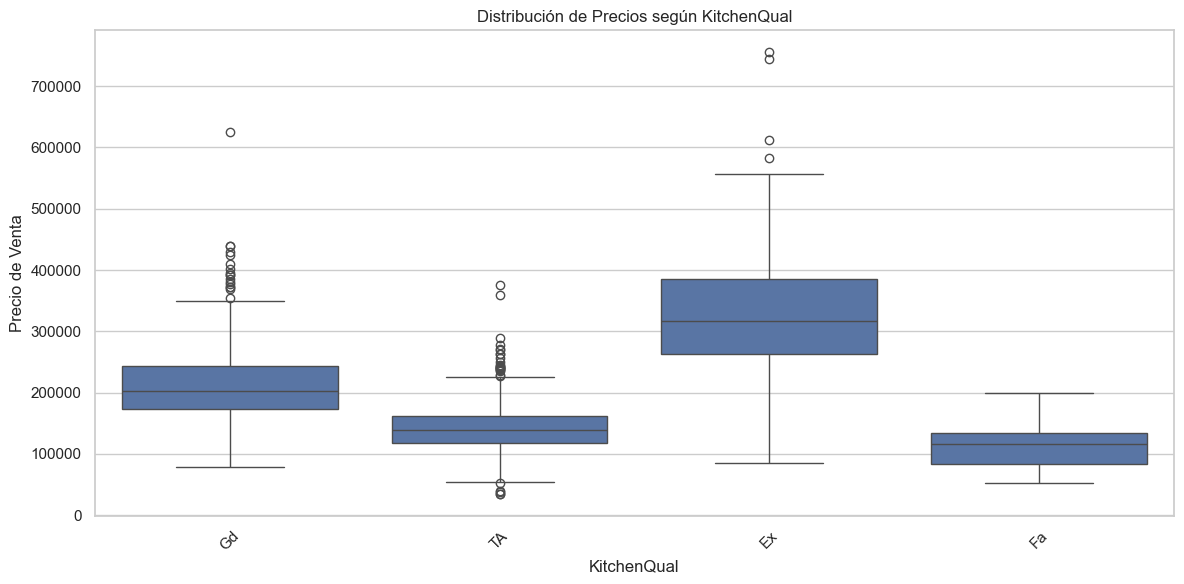

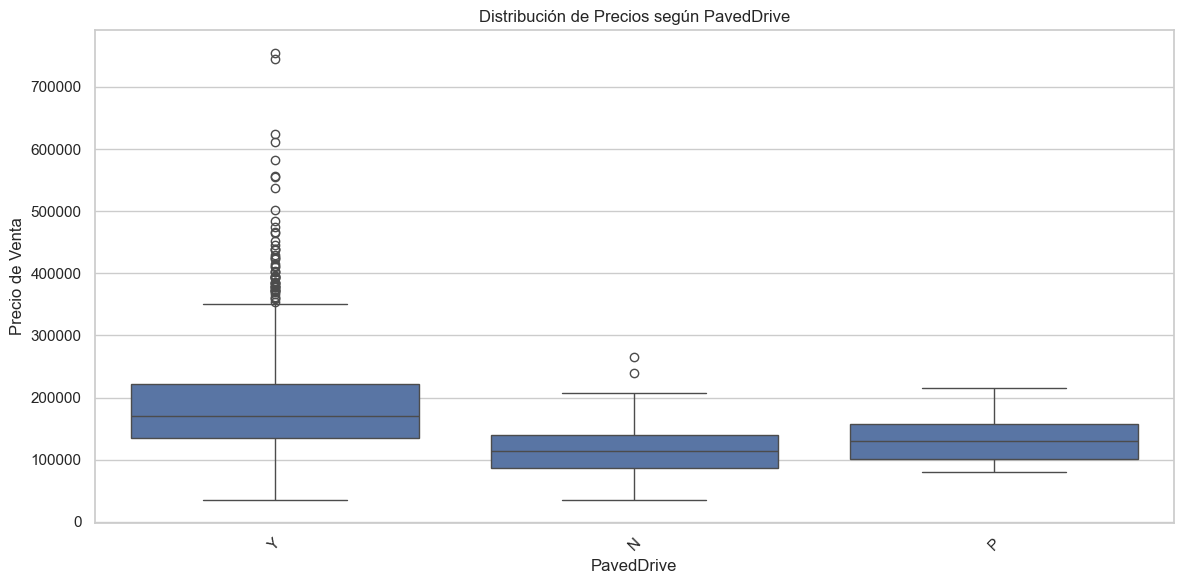

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista con las variables categóricas a graficar
variables_categoricas = ['Neighborhood', 'ExterQual', 'BsmtCond', 'FireplaceQu', 'Electrical', 'KitchenQual', 'PavedDrive']

sns.set(style="whitegrid")

for var in variables_categoricas:
    plt.figure(figsize=(12,6))  # Tamaño uniforme para todas
    sns.boxplot(x=var, y='SalePrice', data=df_casas_tarea)
    plt.title(f'Distribución de Precios según {var}')
    plt.xlabel(var)
    plt.ylabel('Precio de Venta')
    plt.xticks(rotation=45)  # Rota etiquetas para mejor lectura para varias categorías
    plt.tight_layout()  # Ajusta para que no se corten las etiquetas
    plt.show()


# Fase 3 - Análisis de las columnas 12 a la 16

## 🔹 Montaje de Google Drive y carga de los archivos

Se Realiza la carga de las librerías, se monta Google Drive para poder acceder a los archivos de forma sencilla, que son los archivos del dataset, que existen en la carpeta /content de Colab Notebooks y que se corresponden a las variables casas, casas_kaggle.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

ruta = '/content/drive/MyDrive/Colab Notebooks/content/'
casas = pd.read_csv(ruta + 'Casas.csv')
casas_kaggle = pd.read_csv(ruta + 'Casas_Kaggle.csv')



## 🔹 Selección de variables y reemplazo lógico de valores faltantes

En esta parte se selecciona el subconjunto de variables indicadas por el profesor y se imputan valores lógicos en variables donde Nan representa la ausencia de una cualidad (como chimenea o sótano).


In [2]:
variables = [
    'SalePrice', 'MSZoning', 'LotArea', 'Street', 'Neighborhood', 'YearBuilt',
    'OverallCond', 'ExterQual', 'GrLivArea', 'FullBath', 'GarageArea',
    'BsmtCond', 'FireplaceQu', 'Electrical', 'LotFrontage', 'KitchenQual', 'PavedDrive'
]

casas = casas[variables].copy()
casas_kaggle = casas_kaggle[[v for v in variables if v != 'SalePrice']].copy()

# Imputación lógica para cualidades ausentes
for col in ['FireplaceQu', 'BsmtCond']:
    casas.loc[:, col] = casas[col].fillna('None')
    casas_kaggle.loc[:, col] = casas_kaggle[col].fillna('None')




## 🔹 Instalación del entorno R y del paquete missForest

Se instala rpy2 para correr código de R desde Python. También se instala y carga el paquete missForest, que permite imputar valores faltantes mediante árboles aleatorios en R.


In [ ]:
!pip install -q rpy2
%load_ext rpy2.ipython


In [697]:
%%R
install.packages("missForest")
library(missForest)


--- Please select a CRAN mirror for use in this session ---

The downloaded binary packages are in
	/var/folders/zr/py0pd6bs6gnfzg9ljbgr9v0c0000gn/T//RtmpVeupUj/downloaded_packages


probando la URL 'https://cran.itam.mx/bin/macosx/big-sur-arm64/contrib/4.4/missForest_1.5.tgz'
Content type 'application/x-gzip' length 343906 bytes (335 KB)
downloaded 335 KB



## 🔹 Imputación de datos faltantes usando el algoritmo MissForest en R

En esta sección se realiza la imputación de datos faltantes usando el algoritmo **MissForest**, que es una técnica basada en bosques aleatorios (Random Forests) para imputar tanto variables numéricas como categóricas de manera no paramétrica.

Dado que el algoritmo original está implementado en R, se utiliza la interfaz rpy2 para ejecutar código R desde Google Colab.

####  Procedimiento realizado:

1. Se envió el DataFrame casas de Python a R como casas_r.
2. Se convirtieron las columnas categóricas (character) en factores (factor), tal como lo requiere MissForest.
3. Se ejecutó missForest() con semilla aleatoria fija (set.seed(123)) para garantizar reproducibilidad.
4. Después de la imputación, los factores se **convirtieron nuevamente a texto (character)** para evitar que las categorías regresaran a Python como valores numéricos (por ejemplo, "RL" → 4).
5. Finalmente, se recuperó el DataFrame imputado (casas_imputadas) de vuelta en Python y se guardó como casas_preprocesadas.csv.

Es importante mencionar que ciertos valores como "None" (por ejemplo, en la columna FireplaceQu) **no son considerados datos faltantes reales**, sino categorías válidas que indican la ausencia de una característica (por ejemplo, ausencia de chimenea), y por tanto **no fueron imputados**, sino preservados.


In [ ]:
from rpy2.robjects import pandas2ri, globalenv
pandas2ri.activate()

casas_r = casas.copy()
casas_r.replace("NA", np.nan, inplace=True)
globalenv['casas_r'] = pandas2ri.py2rpy(casas_r)

In [707]:
%%R
# Convertimos columnas tipo "character" a "factor"
for (col in names(casas_r)) {
  if (class(casas_r[[col]]) == "character") {
    casas_r[[col]] <- as.factor(casas_r[[col]])
  }
}

set.seed(123)
casas_imputadas <- missForest(casas_r)$ximp

# Convertimos los factores resultantes a texto para no perder etiquetas
casas_imputadas[] <- lapply(casas_imputadas, function(x) {
  if (is.factor(x)) as.character(x) else x
})


In [709]:
#Recuperamos el archivo a python y guardamos el archivo imputado
casas_final = pandas2ri.rpy2py(globalenv['casas_imputadas'])
casas_final.to_csv(ruta + 'casas_preprocesadas.csv', index=False)



# 🔹 Imputación multivariada con missForest (Casas_Kaggle.csv)

Se repite el mismo proceso de imputación para el conjunto de prueba Casas_Kaggle.csv. El objetivo es mantener consistencia con los datos de entrenamiento.


In [ ]:
casas_kaggle_r = casas_kaggle.copy()
casas_kaggle_r.replace("NA", np.nan, inplace=True)
globalenv['casas_kaggle_r'] = pandas2ri.py2rpy(casas_kaggle_r)


In [ ]:
%%R
# Convertimos columnas tipo "character" a "factor"
for (col in names(casas_kaggle_r)) {
  if (class(casas_kaggle_r[[col]]) == "character") {
    casas_kaggle_r[[col]] <- as.factor(casas_kaggle_r[[col]])
  }
}

set.seed(123)
casas_kaggle_imputadas <- missForest(casas_kaggle_r)$ximp

# Convertimos factores a texto para que no regresen como números
casas_kaggle_imputadas[] <- lapply(casas_kaggle_imputadas, function(x) {
  if (is.factor(x)) as.character(x) else x
})


In [ ]:
#Recuperamos el archivo a python y guardamos el archivo imputado
casas_kaggle_final = pandas2ri.rpy2py(globalenv['casas_kaggle_imputadas'])
casas_kaggle_final.to_csv(ruta + 'casas_kaggle_preprocesadas.csv', index=False)

## 🔹 Análisis de la distribución de SalePrice

En esta sección se analiza la distribución de la variable de respuesta SalePrice (precio de venta de las casas). Para ello, se utilizó un histograma acompañado de una curva KDE (Kernel Density Estimation), que nos permite observar la forma de la distribución de los datos.

Este análisis ayuda a identificar si los precios siguen una distribución normal o si están sesgados, lo cual es importante para futuras transformaciones, modelado o interpretación de resultados.




La distribución de SalePrice es asimétrica hacia la derecha, con la mayoría de los precios concentrados entre 100,000 y 200,000. Hay pocas viviendas con precios muy altos, lo que genera una cola larga. Esta forma sugiere que no sigue una distribución normal, algo a considerar si se aplican modelos sensibles a la forma de la variable.



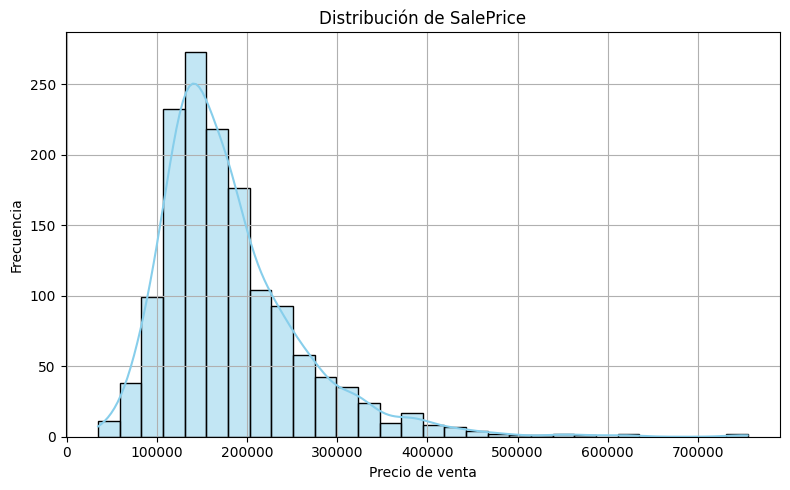

In [ ]:
# Distribución de SalePrice con histograma y curva KDE

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#ruta = '/content/drive/MyDrive/Colab Notebooks/content/'
ruta = ""
casas_final = pd.read_csv(ruta + 'casas_preprocesadas.csv')

# Asegurar que SalePrice sea numérico y eliminar NaNs
casas_final['SalePrice'] = pd.to_numeric(casas_final['SalePrice'], errors='coerce')
saleprice_data = casas_final['SalePrice'].dropna()

plt.figure(figsize=(8, 5))
sns.histplot(saleprice_data, kde=True, color='skyblue', bins=30)
plt.title('Distribución de SalePrice')
plt.xlabel('Precio de venta')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔹 Relación de SalePrice con variables continuas

En esta sección se estudia la relación entre SalePrice y diferentes variables continuas como LotArea, YearBuil, GrLivArea, GarageArea y LotFrontage. Estas variables tienen un carácter numérico y representan dimensiones físicas o características medibles de las propiedades.

Se generaron gráficos de dispersión (scatterplots) para visualizar la correlación entre cada variable y el precio de venta. Estos gráficos permiten identificar tendencias lineales, agrupamientos, valores atípicos y posibles relaciones que podrían ser útiles en el modelado predictivo.


1. **LotArea:** Hay muchos puntos con áreas pequeñas, lo que hace difícil notar una tendencia clara. Aunque hay terrenos grandes con precios altos, también encontramos algunos que son raros y están por ahí.
2. **YearBuilt:** Se nota que las casas más nuevas suelen venderse a precios más altos. Desde el año 2000, los precios han subido bastante.
3. **GrLivArea:** Esta variable se relaciona claramente con el precio de venta. Cuanto más grande es el área habitable, más alto es el precio. Es una de las que mejor se parece al precio en los gráficos.
4. **GarageArea:** También tiene una relación positiva con el precio de venta. No es tan fuerte como la de GrLivArea, pero el tamaño del garaje sí afecta el valor, sobre todo cuando tiene entre 400 y 500 unidades.
5. **LotFrontage:** Hay una ligera tendencia al alza, aunque los datos están más dispersos. Algunos lotes con frentes grandes no siempre tienen precios más altos, así que esa relación no es muy fuerte.

En general, GrLivArea y YearBuilt parecen ser las variables continuas que más influyen en SalePrice.

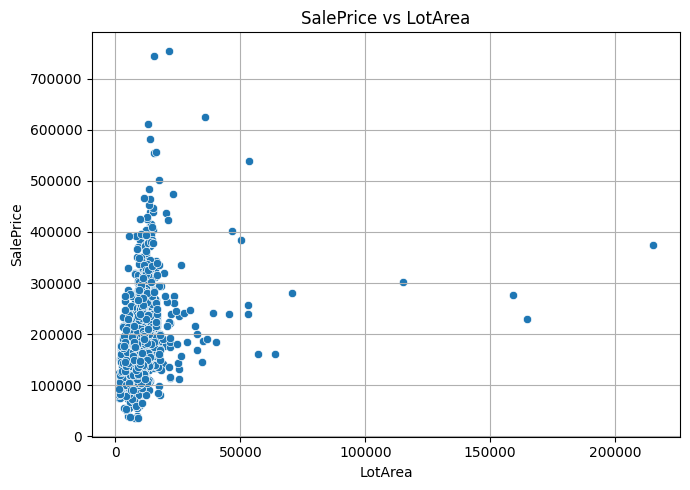

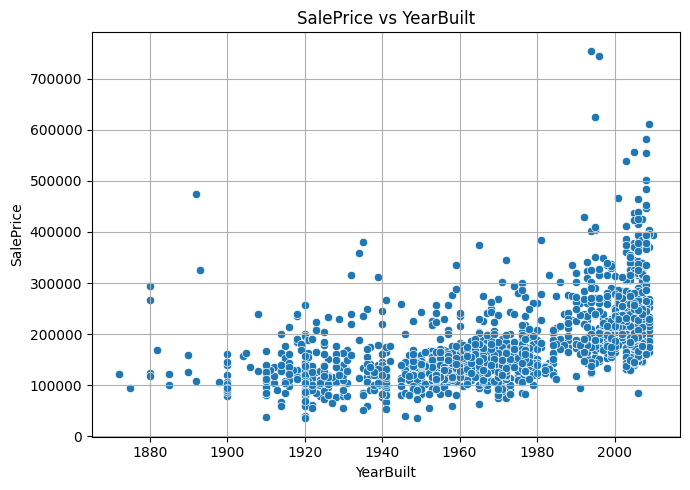

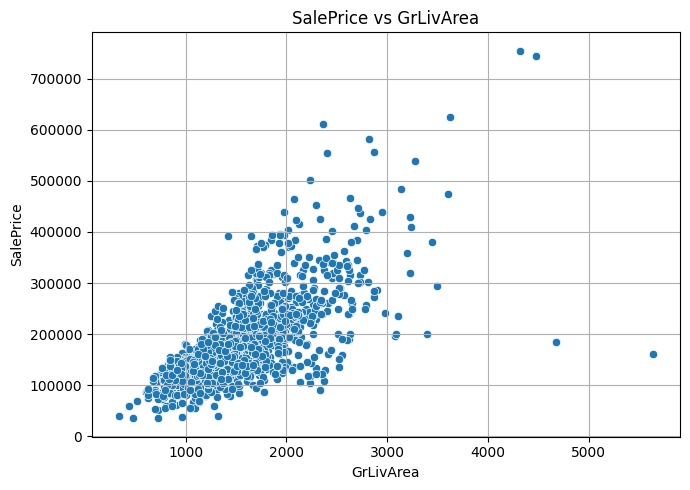

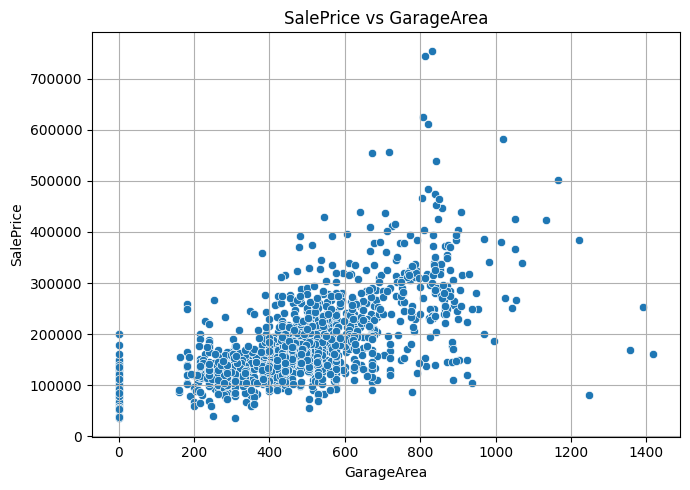

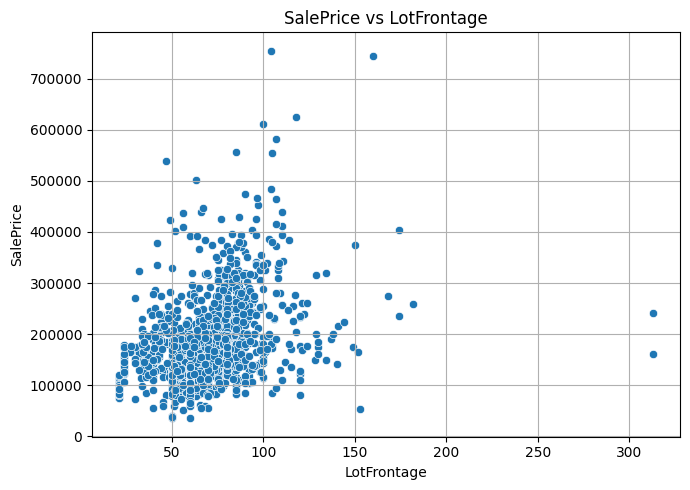

In [ ]:
# Relación de SalePrice con variables continuas

variables_continuas = ['LotArea', 'YearBuilt', 'GrLivArea', 'GarageArea', 'LotFrontage']

# Verificar que existan y que sean numéricas
for col in variables_continuas:
    if col in casas_final.columns:
        casas_final[col] = pd.to_numeric(casas_final[col], errors='coerce')
        plt.figure(figsize=(7, 5))
        sns.scatterplot(data=casas_final, x=col, y='SalePrice')
        plt.title(f'SalePrice vs {col}')
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


## 🔹 Relación de SalePrice con variables ordinales o categóricas

En esta sección se analiza cómo varía SalePrice respecto a variables categóricas de tipo ordinal, como ExterQual, FireplaceQu, BsmtCond y KitchenQual. Estas variables describen características cualitativas de las casas, usualmente con niveles de calidad o condición.

Se utilizaron diagramas de caja (boxplots) para comparar la distribución del precio de venta entre los diferentes niveles de cada variable. Esto permite observar si existen diferencias sistemáticas en el precio según el nivel cualitativo, lo cual es clave para el análisis de impacto de calidad y diseño en el valor final de las viviendas.


1. KitchenQual: Se ve una tendencia bastante clara: las casas con cocinas de alta calidad (Ex) se venden por mucho más que las que tienen calidad regular (TA) o baja (Fa). Así que parece que la cocina juega un papel importante en el valor de la casa.

2. ExterQual: Algo parecido pasa con las casas que tienen mejores acabados exteriores (Ex), ya que su valor de mercado también es más alto. Los boxplots muestran diferencias bastante marcadas entre las calidades.

3. FireplaceQu: Las chimeneas de mejor calidad (Ex, Gd) están relacionadas con un mayor SalePrice. Aunque hay más variabilidad en los precios en todos los niveles, la tendencia sigue siendo clara: mejor calidad significa un mayor precio.

4. BsmtCond: La mayoría de las casas están en la categoría TA, pero las que tienen un sótano en buena condición (Gd) tienden a tener precios un poquito más altos. La diferencia no es tan marcada como en otras variables, pero se puede notar la relación.

En conjunto, estas variables categóricas tienen impacto importante en el precio de venta, especialmente KitchenQual y ExterQual.

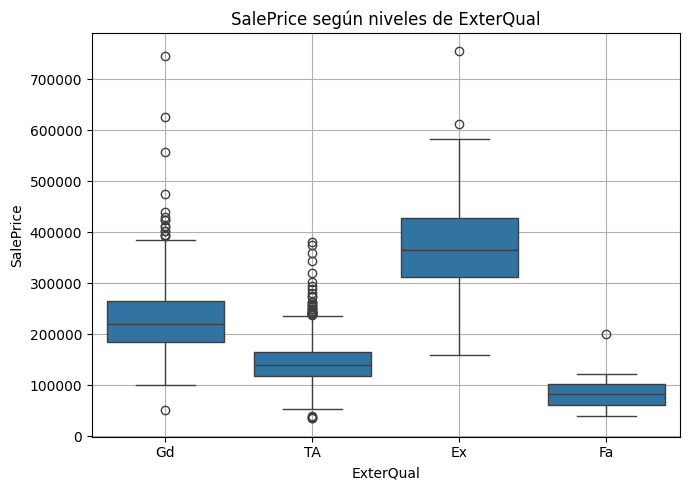

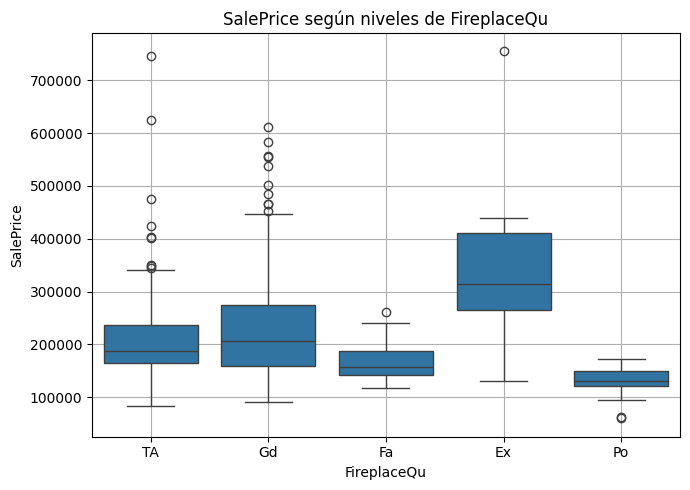

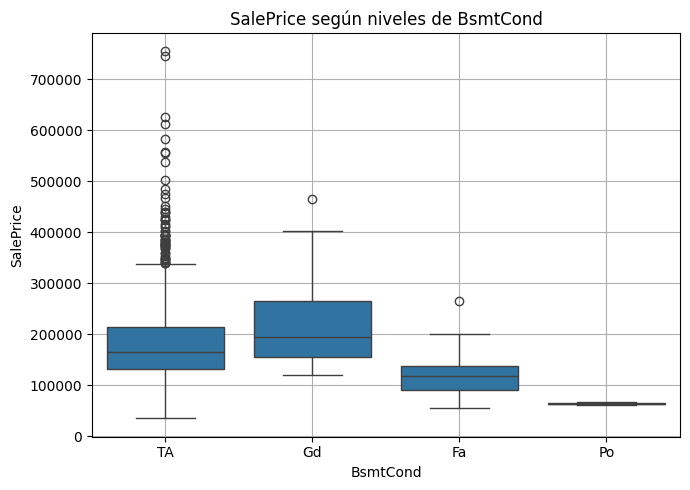

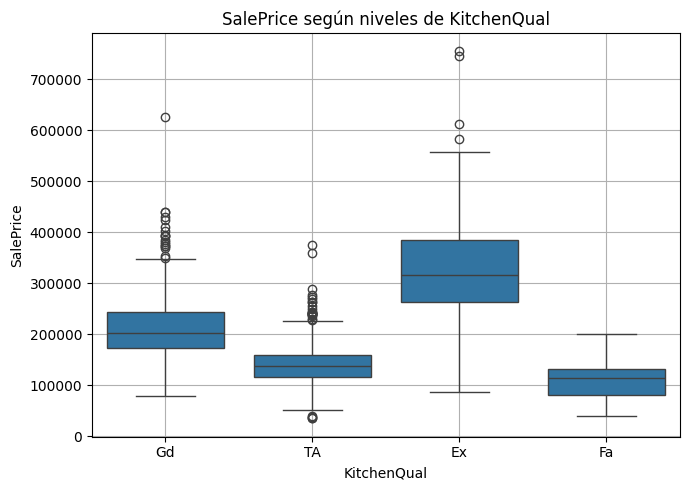

In [ ]:
# Relación de SalePrice con variables ordinales o categóricas

variables_ordinales = ['ExterQual', 'FireplaceQu', 'BsmtCond', 'KitchenQual']

for col in variables_ordinales:
    if col in casas_final.columns:
        plt.figure(figsize=(7, 5))
        sns.boxplot(data=casas_final, x=col, y='SalePrice')
        plt.title(f'SalePrice según niveles de {col}')
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


## Columna 12 – **FireplaceQu**

La variable FireplaceQu representa la calidad de la chimenea de la vivienda, en caso de tenerla. Al ser una variable ordinal, los niveles representan un orden jerárquico de calidad.

Estos son los valores que puede tomar:


*   **Ex** — Excelente calidad

*   **Gd** — Buena calidad
*   **TA** — Calidad promedio
*   **Fa** — Calidad regular o deficiente
*   **Po** — Mala calidad


*   **None** — Sin chimenea (valor faltante imputado)






Podemos visualizar los primeros valores con:

In [ ]:
casas_final['FireplaceQu'] = casas_final['FireplaceQu'].fillna('None')

In [ ]:
casas_final["FireplaceQu"].head()


,FireplaceQu
0,None
1,TA
2,TA
3,Gd
4,TA


Y ver la frecuencia con:

In [ ]:
casas_final["FireplaceQu"].value_counts(dropna=False)


,count
FireplaceQu,
None,690
Gd,380
TA,313
Fa,33
Ex,24
Po,20


Podemos hacer un boxplot de estas categorias:

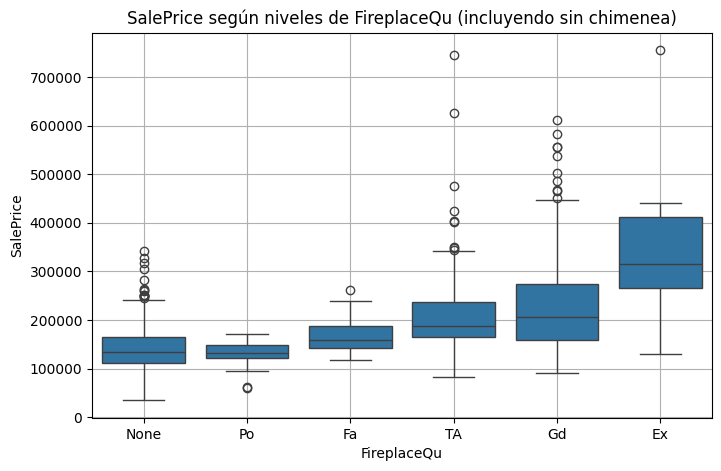

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=casas_final, x='FireplaceQu', y='SalePrice',
            order=['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.title('SalePrice según niveles de FireplaceQu (incluyendo sin chimenea)')
plt.xlabel('FireplaceQu')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()




Vease que las viviendas sin chimenea (None) presentan precios más bajos y concentrados, lo que sugiere que la mera presencia de una chimenea ya representa un valor agregado para la propiedad. Conforme mejora la calidad de la chimenea, el precio de venta tiende a incrementarse, lo cual confirma la relación ordinal lógica de esta variable. Además, las casas con chimeneas de calidad Gd y Ex no solo exhiben precios más altos, sino también una mayor dispersión, lo que indica que estas chimeneas suelen encontrarse en viviendas de gama media-alta o premium. Finalmente, la diferencia observada entre las categorías None, Po y Fa es significativa, mostrando que incluso una chimenea de baja calidad puede ser mejor valorada por los compradores que no tener ninguna.









### Conclusiones sobre la variable **FireplaceQu**


*   FireplaceQu es una variable categórica ordinal que representa la calidad de la chimenea, y se relaciona directamente con el precio de venta de las viviendas.

*   La inclusión de la categoría "None" permite representar correctamente a las viviendas que no tienen chimenea, las cuales constituyen casi la mitad del conjunto de datos.

*   El análisis mediante boxplot revela una relación positiva clara: conforme mejora la calidad de la chimenea (Po → Fa → TA → Gd → Ex), también aumenta el SalePrice.

*   Las viviendas sin chimenea (None) tienden a tener los precios más bajos, confirmando que la presencia de una chimenea, incluso de baja calidad, representa un valor agregado.
*   Las categorías superiores (Gd y Ex) no solo concentran precios más altos, sino también una mayor dispersión, lo cual sugiere que se encuentran en propiedades de mayor valor y más variabilidad.

## Columna 13 – **Electrical**

La variable Electrical indica el tipo de sistema eléctrico que tiene instalada la vivienda. Es una variable nominal, ya que no existe un orden entre las categorías.

Estos son los valores que puede tomar:

*   **SBrkr** — Breakers estándar (más común)

*   **FuseA** — Fuses de 60A

*   **FuseF** — Fuses de 60A sin tierra
*   **FuseP** — Fuses de 60A (posiblemente defectuoso o parcial)



*   **Mix** — Mezcla de distintos sistemas





Podemos visualizar los primeros valores con:

In [ ]:
casas_final["Electrical"].head()


,Electrical
0,SBrkr
1,SBrkr
2,SBrkr
3,SBrkr
4,SBrkr


Y ver la frecuencia de cada categoría:

In [ ]:
casas_final["Electrical"].value_counts(dropna=False)


,count
Electrical,
SBrkr,1335
FuseA,94
FuseF,27
FuseP,3
Mix,1


Podemos hacer un boxplot de estas categorias:

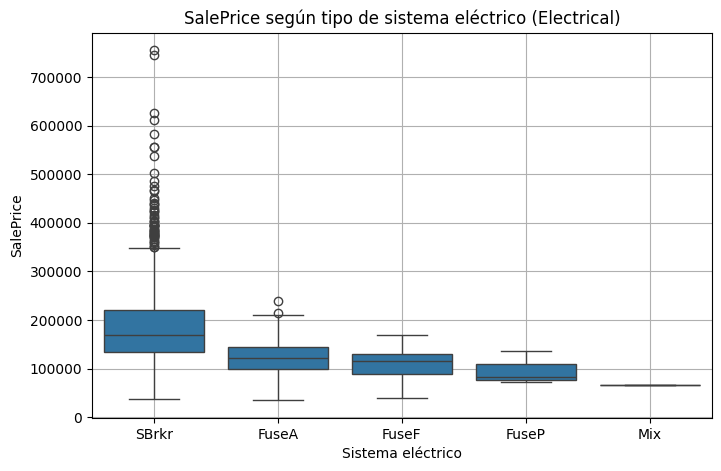

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=casas_final, x='Electrical', y='SalePrice',
            order=casas_final['Electrical'].value_counts().index)
plt.title('SalePrice según tipo de sistema eléctrico (Electrical)')
plt.xlabel('Sistema eléctrico')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()


El gráfico de cajas muestra cómo varía el precio de venta (SalePrice) en función del tipo de sistema eléctrico (Electrical). Se observa que el sistema SBrkr es el más común y está asociado con los precios de venta más altos y una mayor dispersión, lo que indica que aparece tanto en casas de gama media como en propiedades de mayor valor. En cambio, los sistemas basados en fusibles (FuseA, FuseF, FuseP) y la categoría Mix están presentes en muy pocas viviendas y se asocian con precios más bajos y menor variabilidad, lo cual puede reflejar construcciones más antiguas o instalaciones menos modernas. La clara diferencia entre SBrkr y los demás tipos sugiere que el tipo de instalación eléctrica puede influir en la percepción de valor de la vivienda, siendo SBrkr un indicador de mayor confiabilidad y modernidad.

### Conclusiones sobre la variable **Electrical**

*   La variable Electrical es categórica nominal, ya que sus valores representan tipos de sistemas eléctricos sin un orden jerárquico.

*   El valor SBrkr (sistema de interruptores) domina en frecuencia, estando presente en más del 90% de las viviendas.

*   Las casas con sistema SBrkr tienden a tener precios de venta más altos y una mayor dispersión, lo que sugiere que este sistema es más moderno y confiable.

*   Las categorías FuseA, FuseF, FuseP y Mix están presentes en muy pocas viviendas y se asocian con precios de venta más bajos y menos variables, lo cual podría estar relacionado con instalaciones antiguas o menos seguras.
*  
La variable Electrical podría estar correlacionada con la antigüedad de la construcción y es útil para complementar otras variables como YearBuilt o OverallQual.



## Columna 14 – **LotFrontage**

Esta columna representa la longitud del frente del lote de la propiedad, es decir, la cantidad de pies lineales que tiene el terreno en contacto con la calle (en pies).

Al ser una variable continua, puede tomar una amplia gama de valores. Según la descripción estadística obtenida, los valores típicos se encuentran entre 60 y 80 pies, aunque hay propiedades con frentes tan amplios como más de 300 pies, lo cual genera algunos valores atípicos.



In [ ]:
casas_final["LotFrontage"].head()


,LotFrontage
0,65.0
1,80.0
2,68.0
3,60.0
4,84.0


Vemos que es una variable continua, asi que podemos optener un resumen estadistico de la variable si usamos el metodo .describe()

In [ ]:
casas_final['LotFrontage'].describe()


,LotFrontage
count,1460.000000
mean,70.626547
std,22.968865
min,21.000000
25%,60.000000
50%,70.000000
75%,80.531366
max,313.000000


Podemos hacer un histograma para poder visualizar estas descripciones.

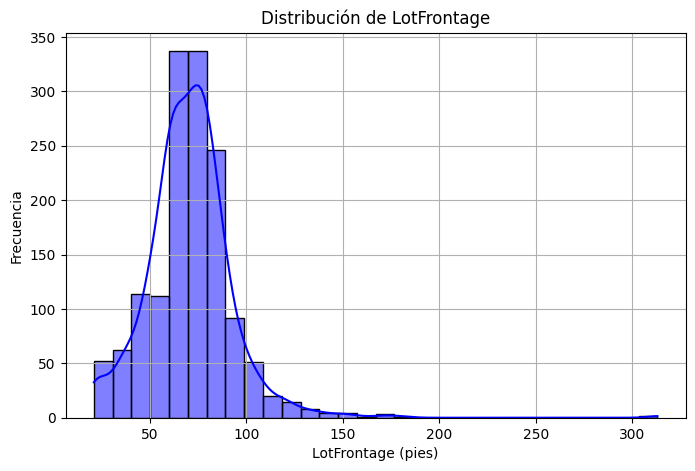

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(casas_final['LotFrontage'], bins=30, kde=True, color='blue')
plt.title('Distribución de LotFrontage')
plt.xlabel('LotFrontage (pies)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



La distribución de LotFrontage presenta una forma asimétrica hacia la derecha. La mayoría de los datos se concentran entre 50 y 100 pies de frente. La curva KDE en azul oscuro permite visualizar mejor el sesgo positivo y la presencia de lotes con frentes inusualmente largos (hasta más de 300 pies).



Podemos hacer un boxplot para ver de una manera mejor los valores atipicos de la variable LotFrontage.

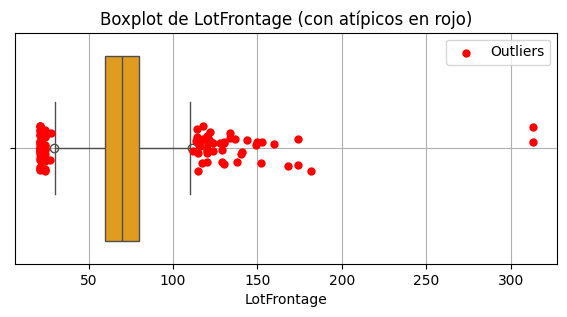

In [ ]:
import numpy as np

# Calcular valores atípicos
Q1 = casas_final['LotFrontage'].quantile(0.25)
Q3 = casas_final['LotFrontage'].quantile(0.75)
IQR = Q3 - Q1
limite_sup = Q3 + 1.5 * IQR
limite_inf = Q1 - 1.5 * IQR

# Separar atípicos
outliers = casas_final[(casas_final['LotFrontage'] > limite_sup) | (casas_final['LotFrontage'] < limite_inf)]['LotFrontage']
normales = casas_final[(casas_final['LotFrontage'] <= limite_sup) & (casas_final['LotFrontage'] >= limite_inf)]['LotFrontage']

# Graficar boxplot personalizado
plt.figure(figsize=(7, 3))
sns.boxplot(x=normales, color='orange')
sns.stripplot(x=outliers, color='red', size=6, jitter=True, label='Outliers')
plt.title('Boxplot de LotFrontage (con atípicos en rojo)')
plt.xlabel('LotFrontage')
plt.grid(True)
plt.legend()
plt.show()



El boxplot de la variable LotFrontage muestra una concentración de valores entre aproximadamente 60 y 100 pies, lo cual se alinea con el rango intercuartílico (IQR) observado previamente.

Los valores atípicos (outliers) están marcados en rojo y se encuentran principalmente en dos extremos:

En el extremo izquierdo: algunos valores por debajo del mínimo típico (menores a 30 pies).

En el extremo derecho: propiedades con frentes de lote muy amplios, incluso mayores a 150 o hasta más de 300 pies.

Estos outliers pueden ser propiedades inusuales (como mansiones o terrenos irregulares) y es importante analizarlos por separado si se desea evitar que distorsionen modelos estadísticos. La cantidad de valores atípicos a la derecha sugiere una asimetría positiva en la variable.


Veamos que tan correlacionadas estan las variables LongFrontage y SalePrice

In [ ]:
casas_final[['LotFrontage', 'SalePrice']].corr()



,LotFrontage,SalePrice
LotFrontage,1.000000,0.356091
SalePrice,0.356091,1.000000


La correlación de Pearson calculada entre estas dos variables es de 0.356, lo que indica una correlación positiva moderada. Es decir, aunque existe una relación directa entre ambas variables, esta no es suficientemente fuerte como para predecir el precio de venta únicamente con LotFrontage, pero sí sugiere que puede ser útil como variable complementaria dentro de un modelo multivariable.

Realizemos la grafica de dispercion de la variable LotFrontage vs SalePrice

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

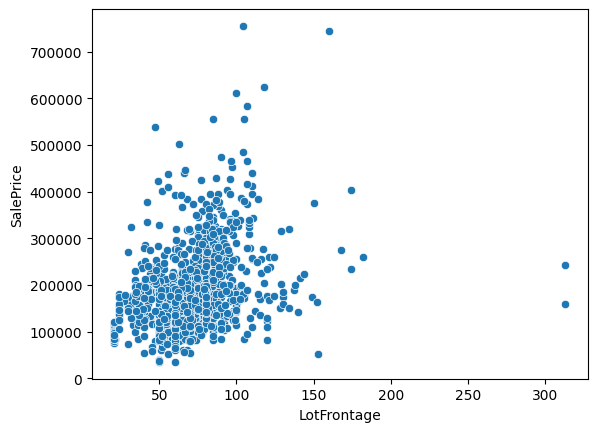

In [ ]:
sns.scatterplot(x='LotFrontage', y='SalePrice', data=casas_final)


La gráfica de dispersión muestra la relación entre la longitud del frente del lote (LotFrontage) y el precio de venta de la vivienda (SalePrice). Visualmente, se aprecia una tendencia ascendente general: a mayor frente de lote, el precio de venta tiende a ser más alto.

Sin embargo, esta relación no es perfectamente lineal, ya que hay bastante dispersión en los puntos, especialmente entre 50 y 100 pies.

### Conclusiones sobre la variable **LotFrontage**
LotFrontage es una variable cuantitativa continua que representa el tamaño del

*   LotFrontage es una variable cuantitativa continua que representa el tamaño del frente del lote en pies
*   La distribución de sus valores es asimétrica hacia la derecha, con la mayoría de los casos concentrados entre 60 y 80 pies
*   Existen varios valores atípicos, principalmente hacia la derecha (mayores a 150 pies), lo cual puede deberse a terrenos atípicos o propiedades especiales como mansiones o esquinas
*   El boxplot confirmó estos outliers, los cuales deben tratarse con cuidado si se utilizan modelos sensibles a valores extremos.
*   La correlación de Pearson con SalePrice fue de 0.356, lo cual indica una relación positiva moderada: en general, a mayor frente de lote, mayor tiende a ser el precio, pero con bastante dispersión.
*   La gráfica de dispersión también reflejó esta relación, mostrando que aunque existe una tendencia creciente, no es lo suficientemente fuerte como para ser usada como predictor único, pero sí útil como variable de apoyo en modelos multivariados.


## Columna 15 – **KitchenQual**

La variable KitchenQual representa la calidad de la cocina de la vivienda. Al ser una variable ordinal, sus valores tienen un orden jerárquico de calidad.

Estos son los valores que puede tomar:
*   **Ex** — Excelente calidad

*   **Fa** — Calidad regular o deficiente
*   **Gd** — Buena calidad
*   **TA** — Calidad promedio

Podemos visualizar los primeros valores con:



In [ ]:
casas_final["KitchenQual"].head()


,KitchenQual
0,Gd
1,TA
2,Gd
3,Gd
4,Gd


Y ver la frecuencia con:

In [ ]:
casas_final["KitchenQual"].value_counts(dropna=False)


,count
KitchenQual,
TA,735
Gd,586
Ex,100
Fa,39


Podemos hacer un boxplot de estas categorías:

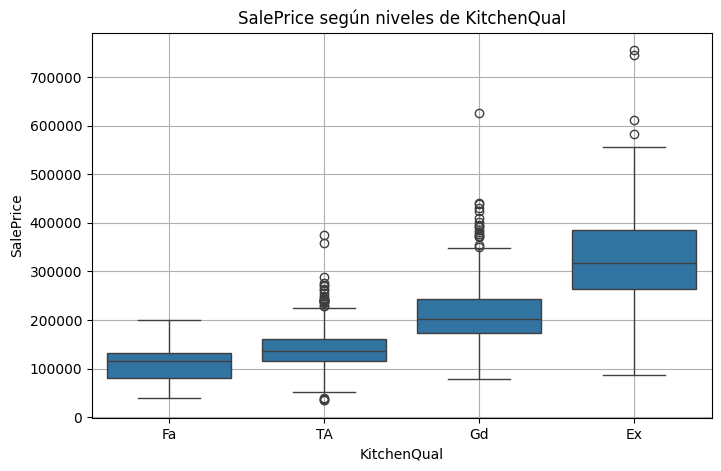

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=casas_final, x='KitchenQual', y='SalePrice',
            order=['Fa', 'TA', 'Gd', 'Ex'])
plt.title('SalePrice según niveles de KitchenQual')
plt.xlabel('KitchenQual')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()


Se observa que las viviendas con cocinas calificadas como Fa presentan los precios de venta más bajos, con poca variabilidad. Conforme aumenta la calidad de la cocina, también se incrementa el valor de la vivienda de forma clara y progresiva. Las cocinas con calidad TA  son las más frecuentes, seguidas por Gd. Finalmente, las casas con cocinas Ex  concentran los precios de venta más altos y la mayor dispersión, lo que sugiere que esta categoría está presente principalmente en viviendas de gama alta. Esta progresión ordenada confirma que KitchenQual es una variable altamente relevante para explicar el comportamiento del precio de venta.

### Conclusiones sobre la variable **KitchenQual**

*   KitchenQual es una variable categórica ordinal que representa la calidad percibida de la cocina de la vivienda.

*   Las cocinas con calificación baja (Fa) están asociadas a precios más bajos y menor variabilidad.

*  Las cocinas Gd y Ex se asocian con precios significativamente más altos y mayor dispersión, lo cual indica que están presentes en viviendas de mayor valor.

*   La relación entre KitchenQual y SalePrice es creciente y lógica, lo que confirma su utilidad como predictor en modelos de regresión o clasificación.


















## Columna 16 – **PavedDrive**

La variable PavedDrive indica si la entrada al garaje de la vivienda está pavimentada o no. Es una variable categórica nominal, ya que sus valores representan opciones distintas sin un orden jerárquico.

Estos son los valores que puede tomar:


*   **Y** — Yes, la entrada está completamente pavimentada

*   **P** — Partial, la entrada está pavimentada parcialmente
*  **N** — No, la entrada no está pavimentada








Podemos visualizar los primeros valores con:

In [ ]:
casas_final["PavedDrive"].head()


,PavedDrive
0,Y
1,Y
2,Y
3,Y
4,Y


Y ver la frecuencia con:

In [ ]:
casas_final["PavedDrive"].value_counts(dropna=False)


,count
PavedDrive,
Y,1340
N,90
P,30


Podemos hacer un boxplot para comparar cómo se relaciona esta variable con el precio de venta:

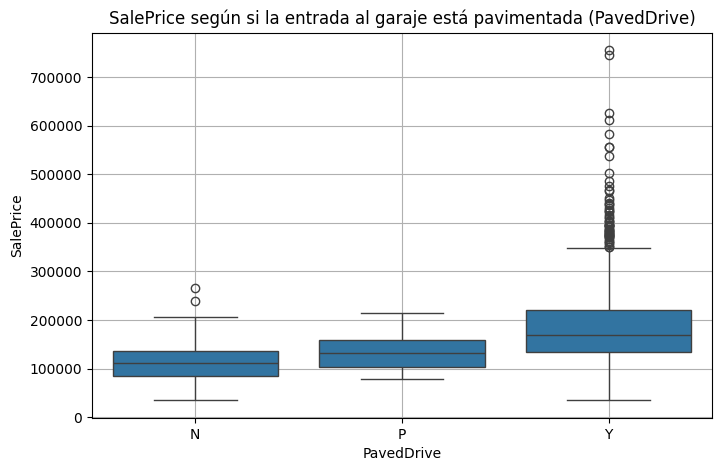

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=casas_final, x='PavedDrive', y='SalePrice',
            order=['N', 'P', 'Y'])
plt.title('SalePrice según si la entrada al garaje está pavimentada (PavedDrive)')
plt.xlabel('PavedDrive')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()


El boxplot revela que las viviendas con entrada no pavimentada (N) presentan los precios de venta más bajos y concentrados, lo que puede asociarse con viviendas más antiguas, ubicaciones rurales o menor nivel de mantenimiento. Las entradas pavimentadas parcialmente (P) muestran un ligero aumento en el precio medio, mientras que las viviendas con entradas completamente pavimentadas (Y) concentran la mayoría de los casos (1340 de 1460) y exhiben una mayor mediana de SalePrice y mayor dispersión. Este patrón indica que una entrada pavimentada no solo mejora la funcionalidad, sino también la percepción del valor del inmueble.

### Conclusiones sobre la variable **PavedDrive**

*   PavedDrive es una variable categórica nominal que refleja la condición del acceso al garaje de la vivienda..

*   Las viviendas con entrada no pavimentada (N) se asocian con los precios de venta más bajos, lo cual puede reflejar menor urbanización o mantenimiento.

*  Las entradas parcialmente pavimentadas (P) presentan una ligera mejora respecto a N, aunque su frecuencia es baja.

*   Las entradas completamente pavimentadas (Y) son las más comunes y están relacionadas con los precios más altos y una mayor variabilidad, lo cual sugiere una asociación con viviendas de mayor valor o más recientes.

* Esta variable puede mejorar el rendimiento de modelos predictivos al capturar una característica visual y funcional que impacta la percepción del comprador.
